In [7]:
pip install scikit-learn

In [8]:
%pip install ipympl

In [9]:
import importlib.util
if importlib.util.find_spec('ipympl') is None:
    print('ipympl is NOT installed!')
else:
    print('ipympl is installed.')

ipympl is installed.


In [40]:
# Exploratory Data Analysis for Airbnb Mexico City Prediction

%matplotlib inline

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [11]:
mexico_airbnb_df = pd.read_csv('/content/cleaned_airbnb_cdmx_2024_prediction_data.csv')

In [12]:
# Part 1 - Data Overview
mexico_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   name                                   1000 non-null   int64
 1   host_id                                1000 non-null   int64
 2   host_name                              1000 non-null   int64
 3   neighbourhood                          1000 non-null   int64
 4   room_type                              1000 non-null   int64
 5   price                                  1000 non-null   int64
 6   minimum_nights                         1000 non-null   int64
 7   number_of_reviews                      1000 non-null   int64
 8   calculated_host_listings_count         1000 non-null   int64
 9   price_category                         1000 non-null   int64
 10  logarithmic_price                      1000 non-null   int64
 11  supermarket                    

In [13]:
# Overview of our data set
mexico_airbnb_df.shape

(1000, 34)

In [14]:
# descriptive statistics for our dataframe
mexico_airbnb_df.describe()

,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,price_category,...,density_park,density_university,density_subway,density_restaurant,dis_to_tourist_point_per_neighborhood,price_per_cluster,disponibility_cat,disponibility_per_review,min_nights_cat,average_measure
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000,1000.000000,1000.000000
mean,497.208000,2.833185e+07,227.643000,5.198000,0.74100,256.091000,4.918000,90.172000,7.5260,2.138000,...,7.199000,0.172000,0.366000,0.142000,2.399000,1461.604000,1.533000,26370.288,0.936000,10.157000
std,287.883371,3.139768e+07,139.291384,3.279566,0.97307,152.267778,19.872095,86.342454,19.9787,1.320113,...,19.161016,0.552015,1.289848,0.513907,1.900371,338.984849,0.873885,35885.187,0.244875,4.613636
min,0.000000,3.683600e+04,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,809.000000,0.000000,0.000,0.000000,0.000000
25%,246.750000,7.838265e+06,112.000000,4.000000,0.00000,128.000000,1.000000,21.000000,1.0000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1092.000000,1.000000,3334.250,1.000000,6.000000
50%,496.500000,2.260495e+07,224.000000,4.000000,0.00000,243.000000,2.000000,57.000000,2.0000,3.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1596.000000,1.000000,10957.500,1.000000,11.000000
75%,746.250000,4.229134e+07,361.000000,9.000000,2.00000,371.000000,3.000000,146.250000,6.0000,3.000000,...,4.000000,0.000000,0.000000,0.000000,3.000000,1775.000000,2.000000,35709.750,1.000000,14.000000
max,996.000000,4.953618e+08,462.000000,13.000000,3.00000,564.000000,365.000000,312.000000,216.0000,4.000000,...,75.000000,2.000000,6.000000,2.000000,15.000000,1883.000000,3.000000,219640.000,1.000000,17.000000


In [15]:
#Display ingthe first 5 rows of a DataFrame
mexico_airbnb_df.head()

,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,price_category,...,density_park,density_university,density_subway,density_restaurant,dis_to_tourist_point_per_neighborhood,price_per_cluster,disponibility_cat,disponibility_per_review,min_nights_cat,average_measure
0,944,153786,103,3,0,518,1,0,1,4,...,0,0,0,0,8,1454,1,0,1,2
1,28,334451,350,4,0,448,2,48,2,0,...,0,0,0,0,3,1775,1,15925,1,17
2,158,212109,436,2,0,286,5,123,3,3,...,12,1,0,0,0,1029,1,32639,1,9
3,690,540705,25,9,0,513,1,11,3,4,...,0,0,0,0,1,1883,1,3025,1,6
4,115,790208,143,9,0,514,2,265,7,4,...,4,0,0,0,1,1775,1,82110,1,6


In [16]:
#Finding Missing Values
# To find any missing or null values we will use the .isnull().sum method.
mexico_airbnb_df.isnull().sum()

,0
name,0
host_id,0
host_name,0
neighbourhood,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
calculated_host_listings_count,0
price_category,0


The code above shows that we have no missing values.

In [27]:
#The code below will calculated the percentage of missing values
mexico_airbnb_df.isnull().mean() * 100

,0
name,0.0
host_id,0.0
host_name,0.0
neighbourhood,0.0
room_type,0.0
price,0.0
minimum_nights,0.0
number_of_reviews,0.0
calculated_host_listings_count,0.0
price_category,0.0


<Axes: xlabel='income_per_month', ylabel='count'>

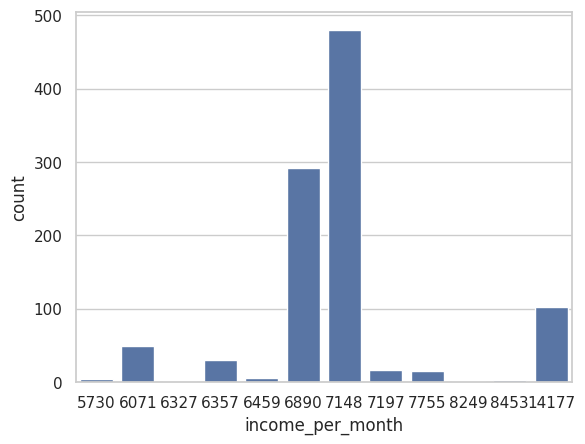

In [28]:
# Part 3. Target Variable Analysis for income_per_month
mexico_airbnb_df['income_per_month'].value_counts() # This line of code calculates and displays the count of each unique value in the 'income_per_month' column
mexico_airbnb_df['income_per_month'].value_counts(normalize=True) #This line of code calculates the counts of each unique value in the 'income_per_month' column
sns.countplot(x='income_per_month', data=mexico_airbnb_df) #Visualizing our unique values in the 'income_per_month' column as bars.

array([[<Axes: title={'center': 'name'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'host_name'}>,
        <Axes: title={'center': 'neighbourhood'}>,
        <Axes: title={'center': 'room_type'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'price_category'}>,
        <Axes: title={'center': 'logarithmic_price'}>,
        <Axes: title={'center': 'supermarket'}>],
       [<Axes: title={'center': 'hospital'}>,
        <Axes: title={'center': 'university'}>,
        <Axes: title={'center': 'subway'}>,
        <Axes: title={'center': 'restaurant'}>,
        <Axes: title={'center': 'park'}>,
        <Axes: title={'center': 'security_index'}>],
       [<Axes: title={'center': 'demand_index'}>,
        <Axes: title={'center': 'income_per_month'}>,
       

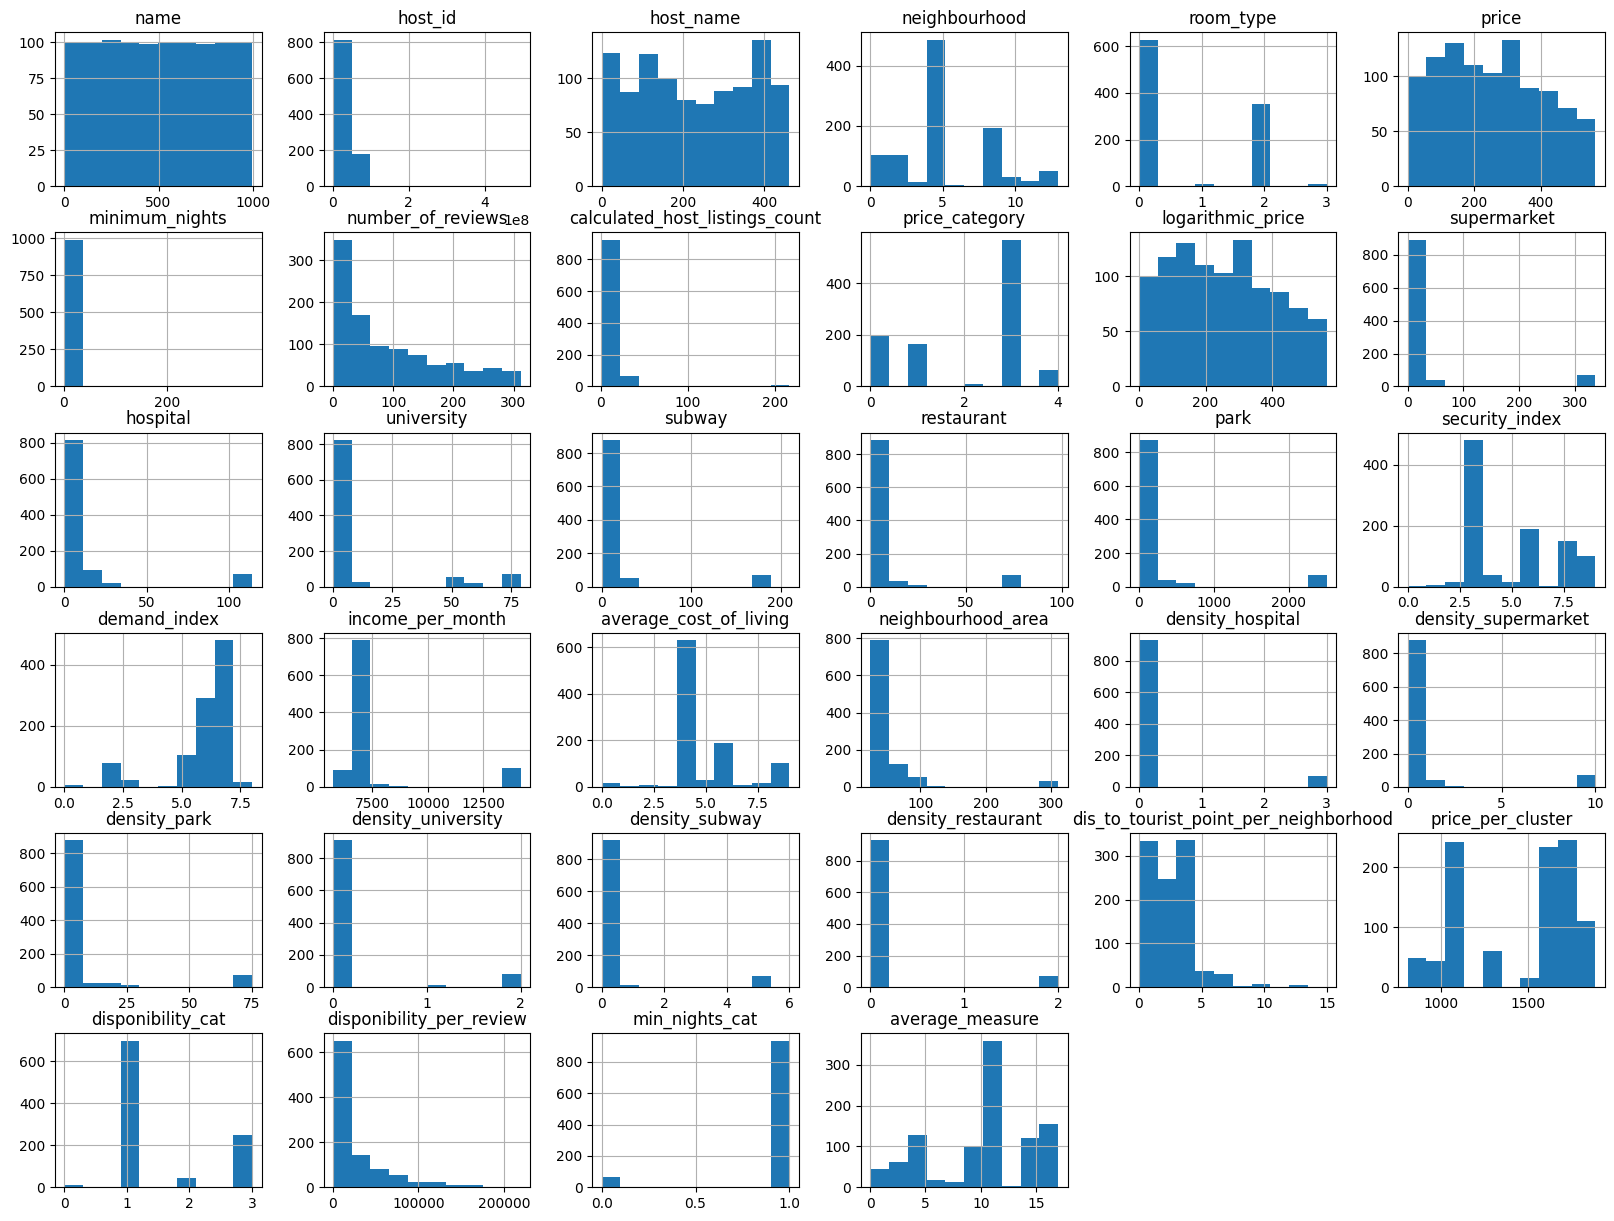

In [19]:
# Part - 4 -  Numerical Features
#Vizualising the distribution of numerical features in the mexico_airbnb_df DataFrame
numerical_cols = mexico_airbnb_df.select_dtypes(include=['int64', 'float64']).columns
mexico_airbnb_df[numerical_cols].hist(figsize=(20, 15))

Step 5 - Categorical Features


In [21]:
#checking categorical features
print(mexico_airbnb_df.columns)

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'price_category', 'logarithmic_price', 'supermarket', 'hospital',
       'university', 'subway', 'restaurant', 'park', 'security_index',
       'demand_index', 'income_per_month', 'average_cost_of_living',
       'neighbourhood_area', 'density_hospital', 'density_supermarket',
       'density_park', 'density_university', 'density_subway',
       'density_restaurant', 'dis_to_tourist_point_per_neighborhood',
       'price_per_cluster', 'disponibility_cat', 'disponibility_per_review',
       'min_nights_cat', 'average_measure'],
      dtype='object')


In [22]:
categorical_features = [
    'name', 'host_name', 'neighbourhood', 'room_type', 'price_category',
    'disponibility_cat', 'min_nights_cat', 'average_measure', 'supermarket'
]

potentially_categorical = [
    'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'hospital', 'university', 'subway', 'restaurant', 'park', 'security_index', 'demand_index', 'neighbourhood_area', 'density_hospital', 'density_supermarket', 'density_park', 'density_university', 'density_subway', 'density_restaurant', 'dis_to_tourist_point_per_neighborhood'
]

for col in categorical_features:
    if col in mexico_airbnb_df.columns:
        mexico_airbnb_df[col] = mexico_airbnb_df[col].astype('category')
    else:
        print(f"Warning: Column '{col}' not found in mexico_airbnb_df")

for col in potentially_categorical:
    if col in mexico_airbnb_df.columns:
        # Check the number of unique values
        unique_count = mexico_airbnb_df[col].nunique()
        total_count = len(mexico_airbnb_df)
        if unique_count / total_count < 0.5:  # Arbitrary threshold: < 50% unique
            mexico_airbnb_df[col] = mexico_airbnb_df[col].astype('category')
            print(f"Converted '{col}' to category")
        else:
            print(f"Column '{col}' not converted (too many unique values)")
    else:
        print(f"Warning: Column '{col}' not found in mexico_airbnb_df")

print("\nDataFrame Info after conversions:")
mexico_airbnb_df.info()  # Display DataFrame info to see data types

Converted 'minimum_nights' to category
Converted 'number_of_reviews' to category
Converted 'calculated_host_listings_count' to category
Converted 'hospital' to category
Converted 'university' to category
Converted 'subway' to category
Converted 'restaurant' to category
Converted 'park' to category
Converted 'security_index' to category
Converted 'demand_index' to category
Converted 'neighbourhood_area' to category
Converted 'density_hospital' to category
Converted 'density_supermarket' to category
Converted 'density_park' to category
Converted 'density_university' to category
Converted 'density_subway' to category
Converted 'density_restaurant' to category
Converted 'dis_to_tourist_point_per_neighborhood' to category

DataFrame Info after conversions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  ---

We now have 1000 rows and 34 columns.The host_id, price, logarithmic_price, average_cost_of_living, neighbourhood_area, income_per_month,price_per_cluster and disponibility_per_review columns remain as int64(integers).

We expected this, as these values are numerical representations for potential further processing or because they might have too many unique values

We can observe that the memory usage has now been reduced to 167.7 kb. This reduction is mostly due to the fact that categorical data is more memory-efficient than object types, especially when there is a high nuber of repeated values.


Top categories for name:

name
234    4
655    1
656    1
657    1
658    1
659    1
660    1
661    1
662    1
663    1
Name: count, dtype: int64


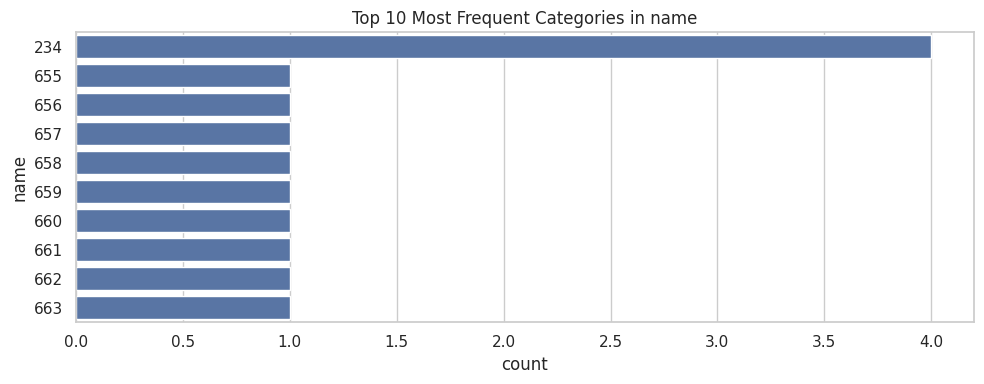


Top categories for host_name:

host_name
389    30
10     27
126    19
112    15
401    14
434    13
289    12
299    10
61     10
26     10
Name: count, dtype: int64


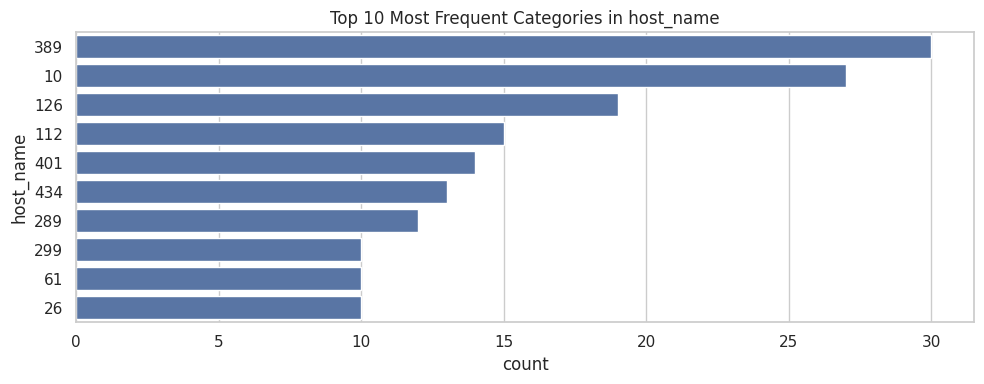


Top categories for neighbourhood:

neighbourhood
4     480
9     188
2     102
1     101
13     49
10     30
11     16
3      15
5       6
8       4
Name: count, dtype: int64


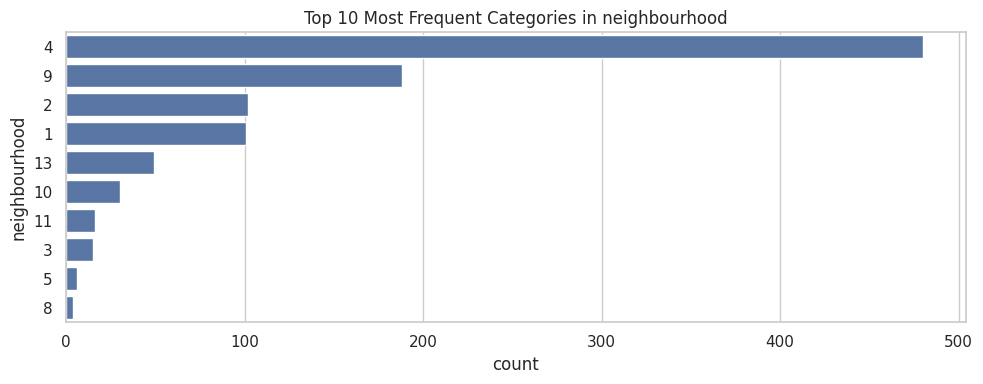


Top categories for room_type:

room_type
0    628
2    353
1     11
3      8
Name: count, dtype: int64


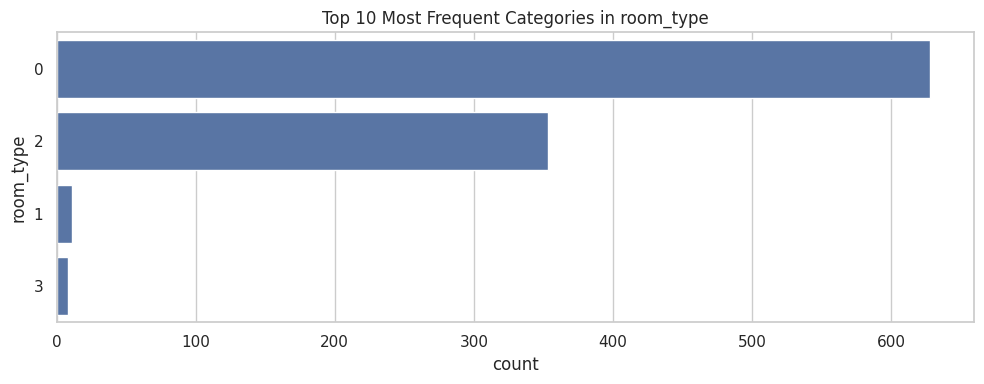


Top categories for minimum_nights:

minimum_nights
2     310
1     290
3     190
4      61
5      46
7      29
6      10
30     10
15     10
10      8
Name: count, dtype: int64


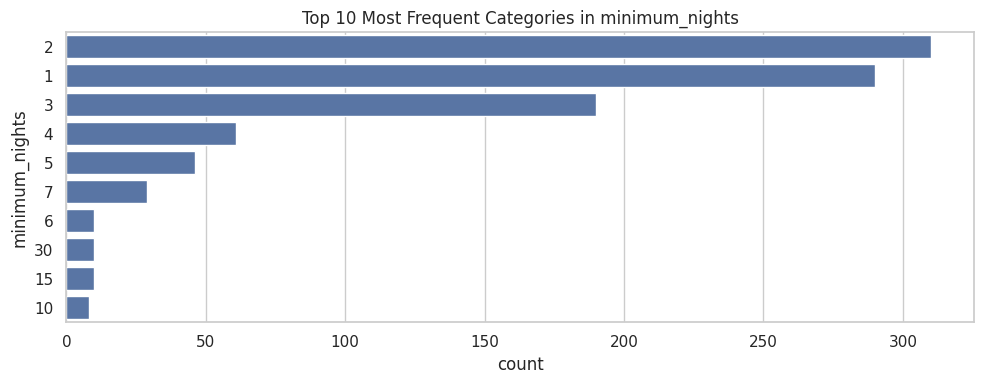


Top categories for number_of_reviews:

number_of_reviews
0     56
2     18
1     18
3     16
21    16
15    14
18    12
6     12
11    12
22    12
Name: count, dtype: int64


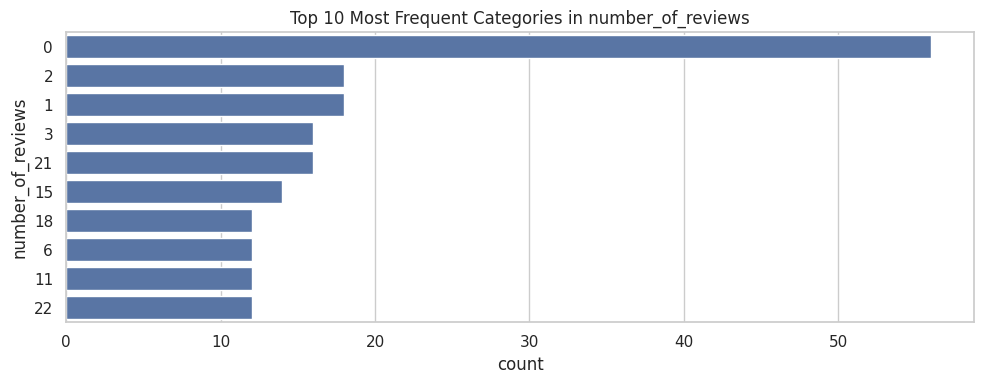


Top categories for calculated_host_listings_count:

calculated_host_listings_count
1     372
2     155
3      95
4      55
5      43
6      41
8      22
11     22
27     21
24     20
Name: count, dtype: int64


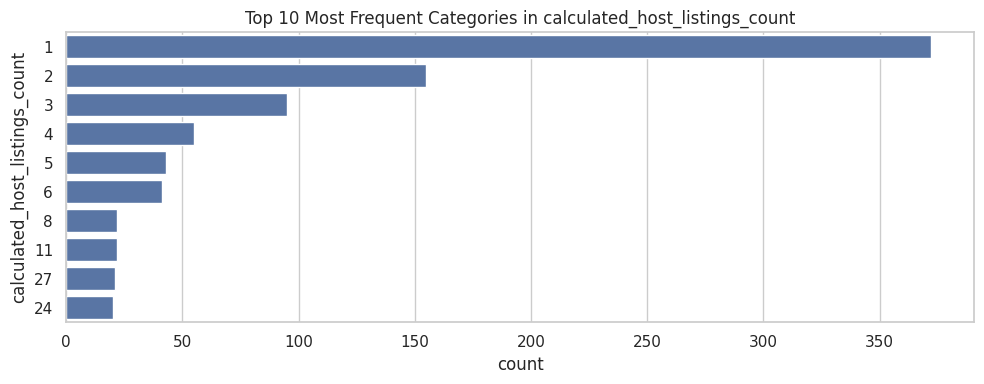


Top categories for price_category:

price_category
3    568
0    195
1    164
4     62
2     11
Name: count, dtype: int64


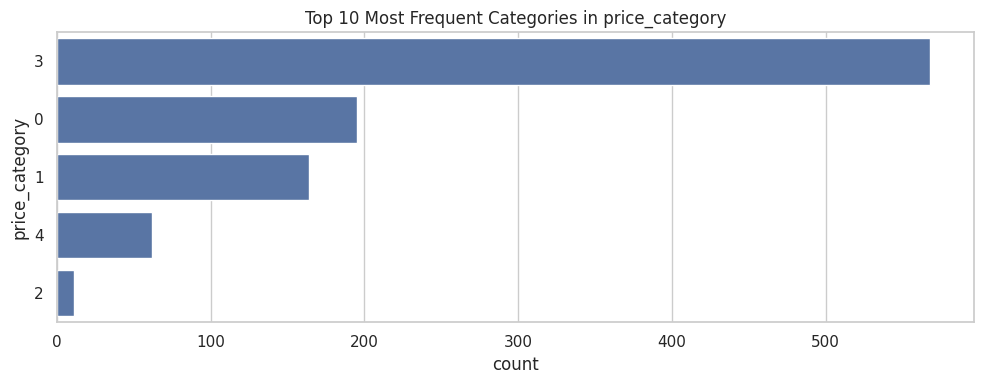


Top categories for supermarket:

supermarket
0      646
32     125
319     70
24      57
27      22
51      20
55      15
23      14
14       9
17       7
Name: count, dtype: int64


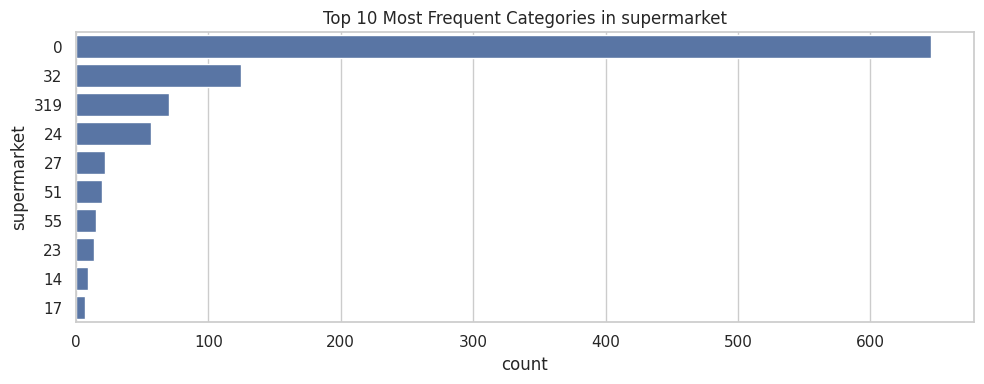


Top categories for hospital:

hospital
0      646
10     125
112     70
12      57
13      22
25      20
7       17
17      15
4        9
2        8
Name: count, dtype: int64


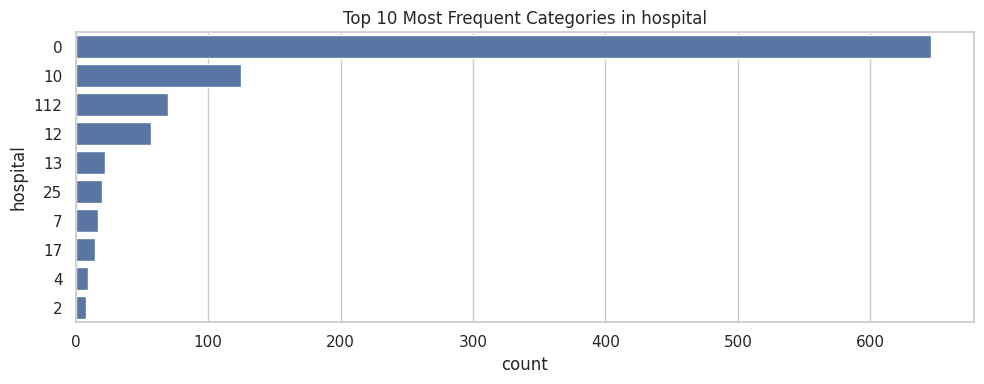


Top categories for university:

university
0     782
79     71
53     57
3      37
8      29
56     20
4       2
1       2
Name: count, dtype: int64


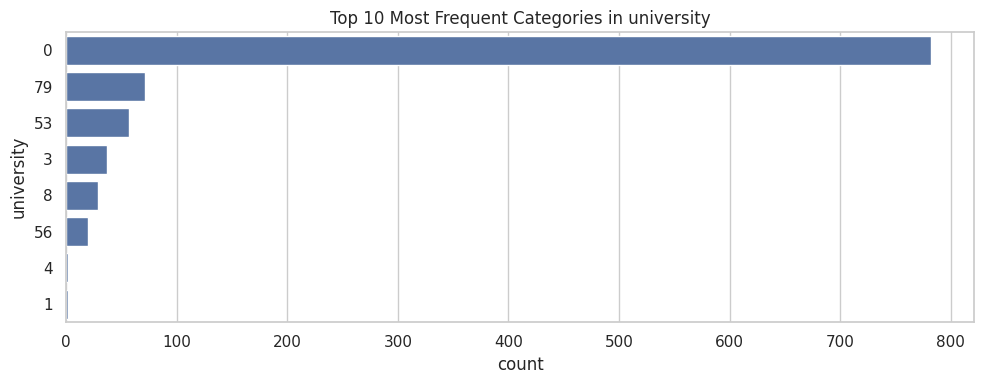


Top categories for subway:

subway
0      654
14     125
17      72
184     70
3       23
21      22
38      20
26       7
20       2
32       2
Name: count, dtype: int64


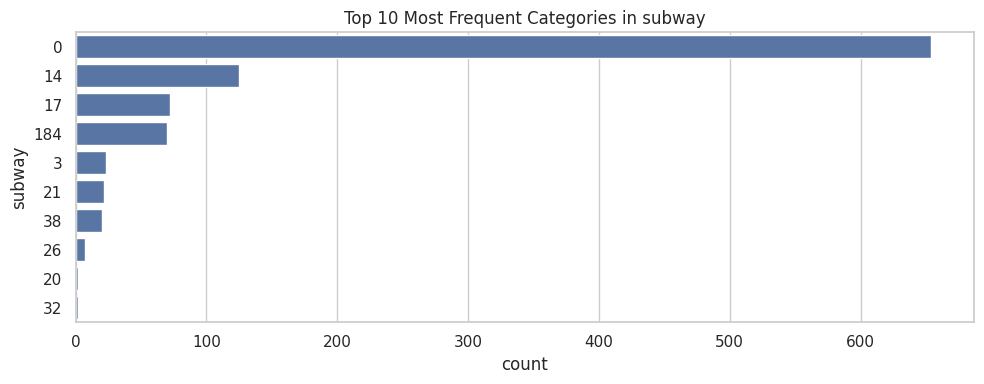


Top categories for restaurant:

restaurant
0     647
6     125
73     70
8      57
4      31
12     20
13     15
7      14
1       9
25      7
Name: count, dtype: int64


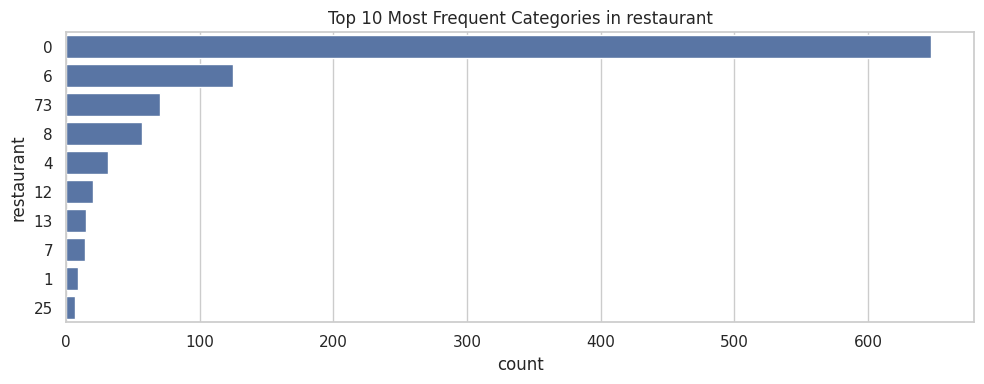


Top categories for park:

park
0       646
232     125
2439     70
242      57
418      22
660      20
316      15
84       14
112       9
65        7
Name: count, dtype: int64


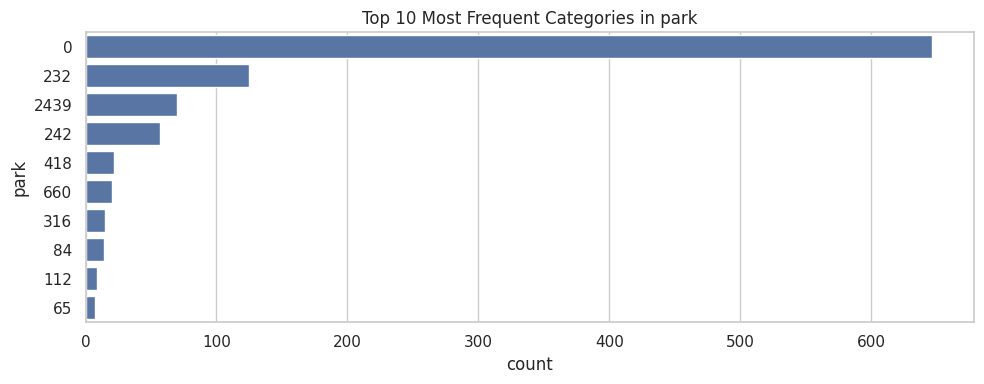


Top categories for security_index:

security_index
3    481
6    188
8    151
9    101
4     37
5     16
2     15
1      6
0      3
7      2
Name: count, dtype: int64


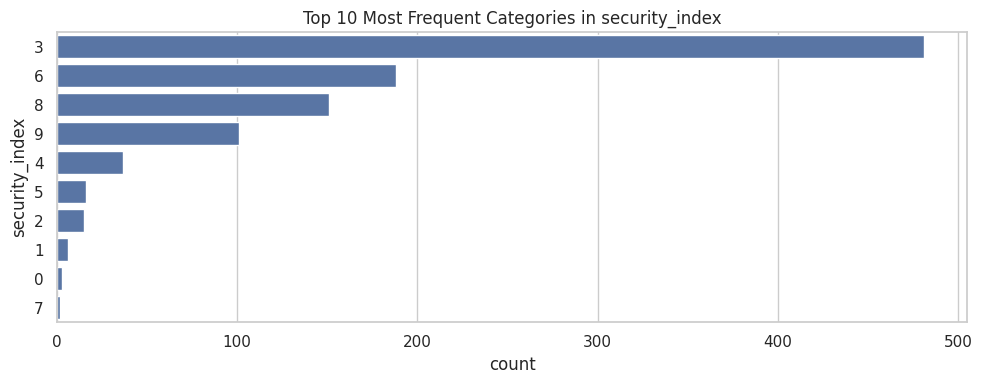


Top categories for demand_index:

demand_index
7    480
6    290
5    104
2     79
3     21
8     16
0      7
4      2
1      1
Name: count, dtype: int64


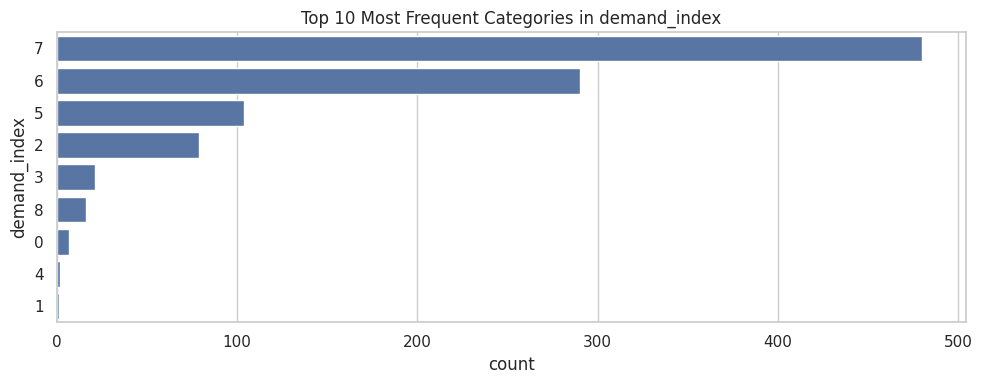


Top categories for neighbourhood_area:

neighbourhood_area
32     480
46     188
54     102
26     101
96      49
311     30
33      18
78      15
94       6
74       4
Name: count, dtype: int64


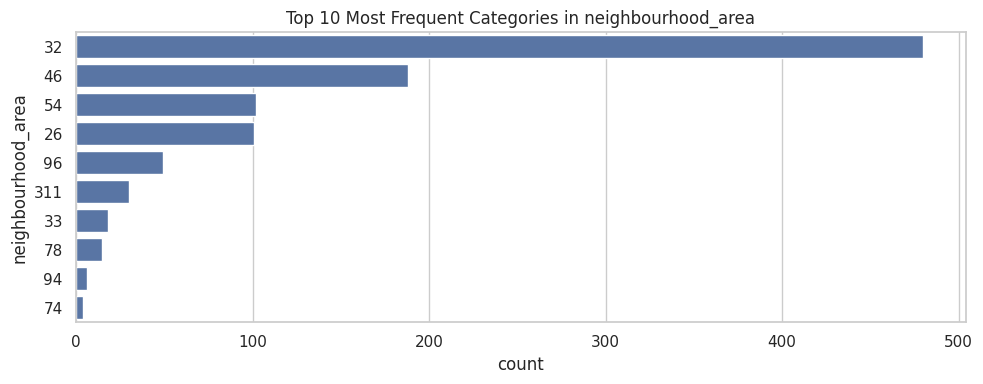


Top categories for density_hospital:

density_hospital
0    929
3     71
Name: count, dtype: int64


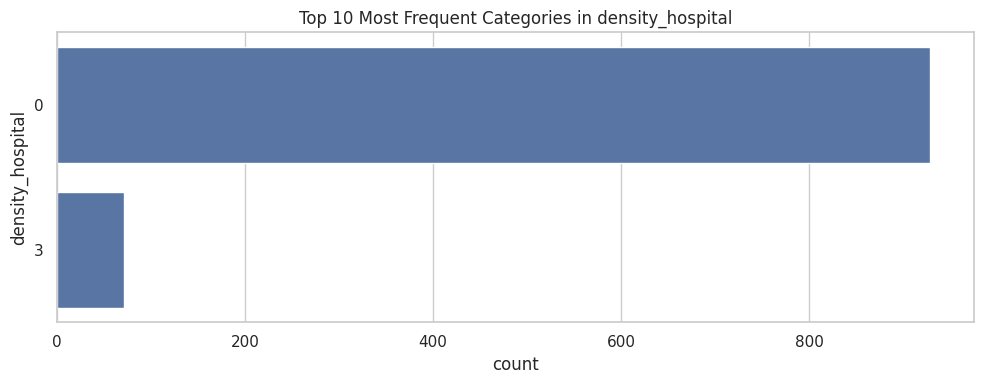


Top categories for density_supermarket:

density_supermarket
0     879
9      70
1      42
2       8
10      1
Name: count, dtype: int64


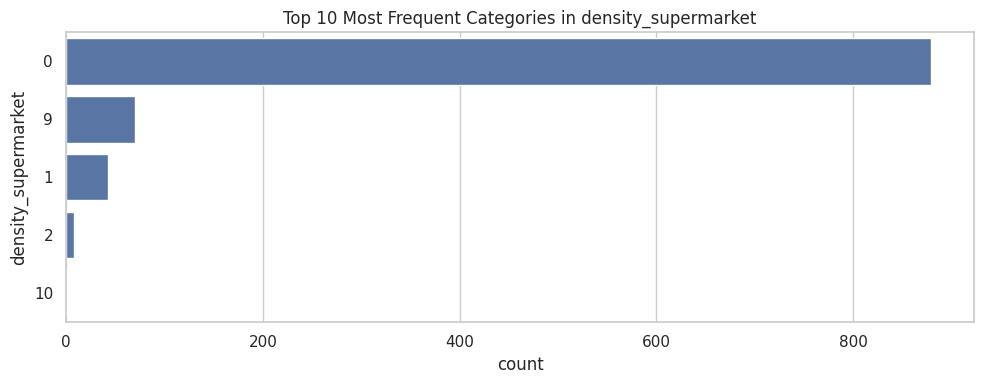


Top categories for density_park:

density_park
0     662
4      94
7      84
75     70
15     22
3      15
24     10
12     10
1       8
11      8
Name: count, dtype: int64


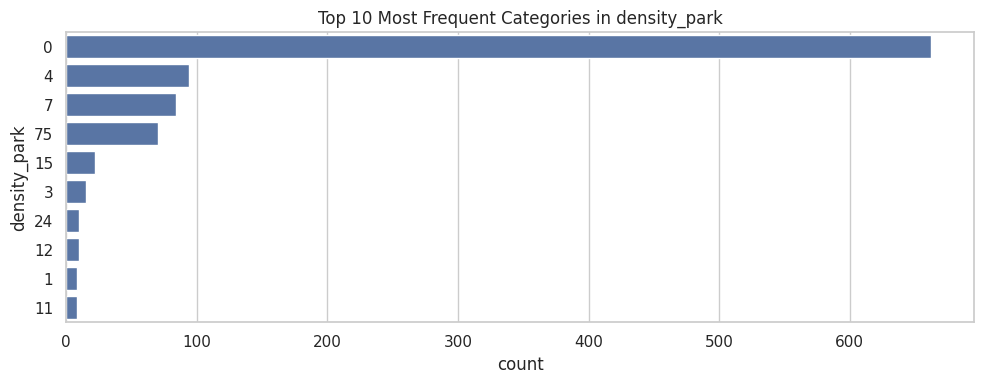


Top categories for density_university:

density_university
0    909
2     81
1     10
Name: count, dtype: int64


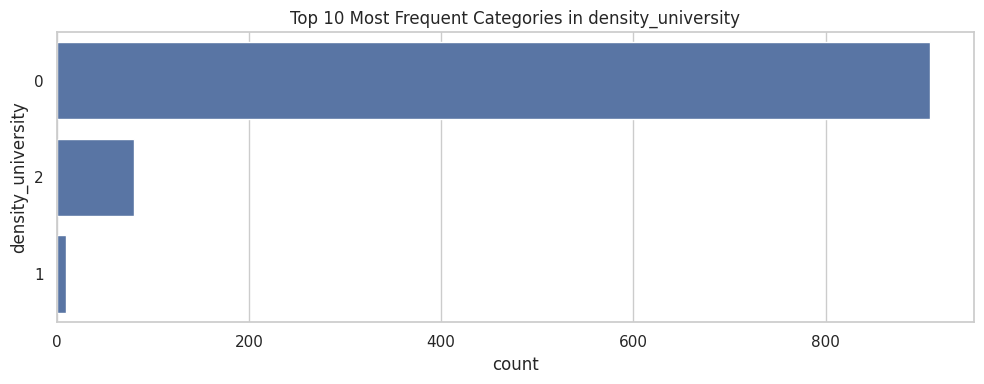


Top categories for density_subway:

density_subway
0    919
5     70
1     10
6      1
Name: count, dtype: int64


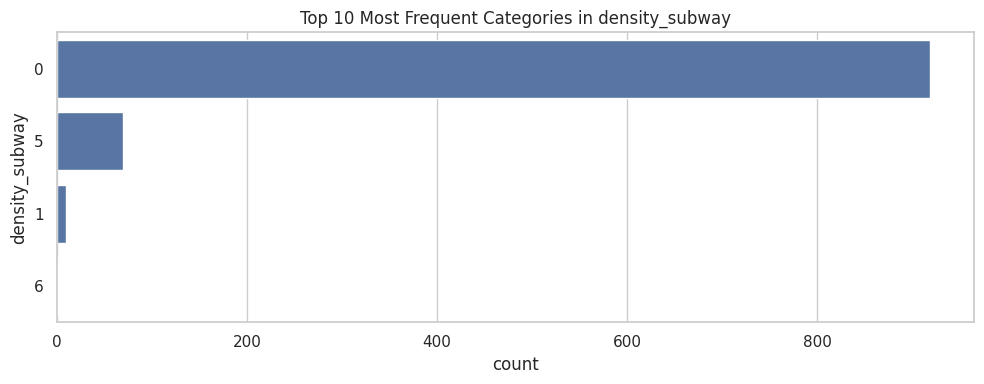


Top categories for density_restaurant:

density_restaurant
0    929
2     71
Name: count, dtype: int64


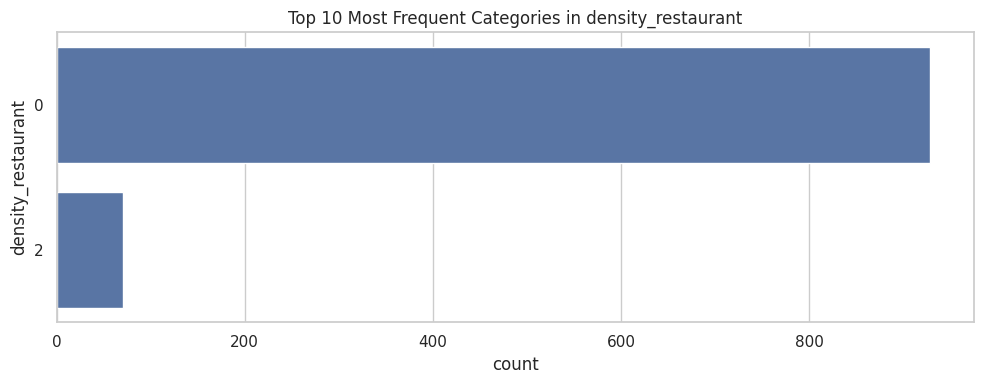


Top categories for dis_to_tourist_point_per_neighborhood:

dis_to_tourist_point_per_neighborhood
2     247
1     196
3     190
4     145
0     138
5      37
6      15
7      15
9       5
10      3
Name: count, dtype: int64


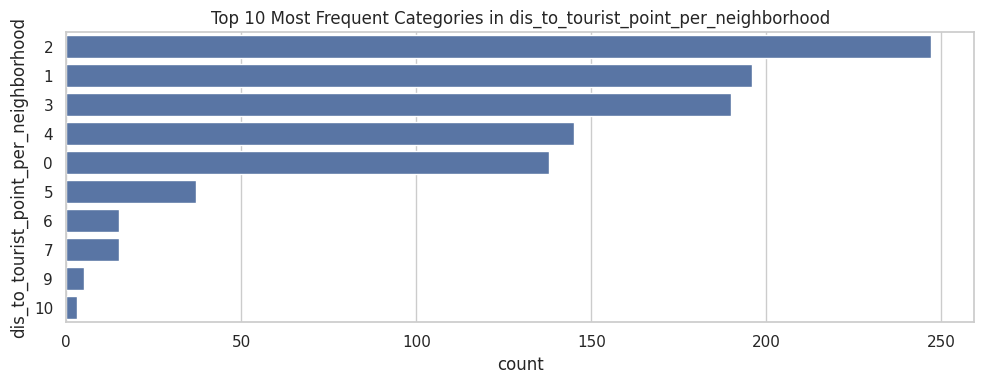


Top categories for disponibility_cat:

disponibility_cat
1    697
3    248
2     46
0      9
Name: count, dtype: int64


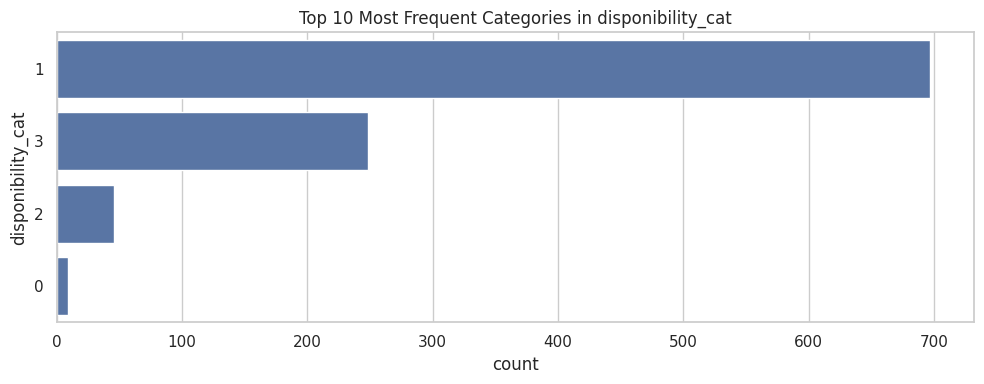


Top categories for min_nights_cat:

min_nights_cat
1    936
0     64
Name: count, dtype: int64


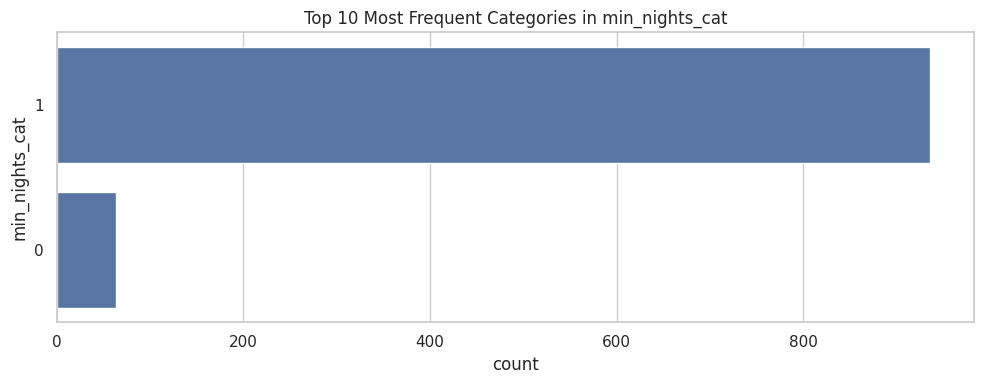


Top categories for average_measure:

average_measure
11    359
17    138
14    119
5      94
9      88
3      51
0      39
4      33
6      18
16     17
Name: count, dtype: int64


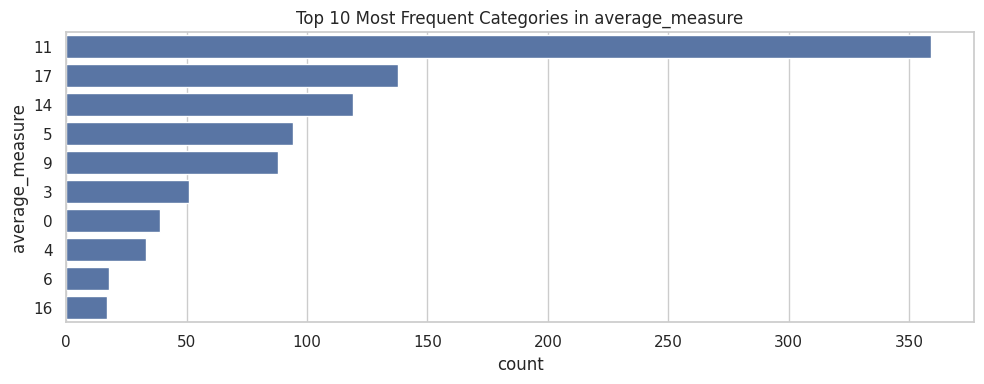

In [33]:
%matplotlib inline
# Optional: set style
sns.set(style="whitegrid")

# Find categorical columns
categorical_cols = mexico_airbnb_df.select_dtypes(include=['object', 'category']).columns

# Plot top 10 categories for each categorical column
for col in categorical_cols:
    print(f"\nTop categories for {col}:\n")
    print(mexico_airbnb_df[col].value_counts().head(10))

    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=mexico_airbnb_df, order=mexico_airbnb_df[col].value_counts().iloc[:10
                                                                                                ].index)
    plt.title(f'Top 10 Most Frequent Categories in {col}')
    plt.tight_layout()
    plt.show()

The bars representing price_category above 500 is much larger than all other bars in prices.

This indicates that there are far more Airbnb's priced between 84 and 361 Mexican Pesos and these prices will greatly influence our income_per_month column.

Popular places: places with a high price_category might have a larger influence on the overall pricing for stays.

Rare Sites: Sites with very low frequencies might be less statistically significant or could be candidates for grouping into a less frequent category. Feature engineering importance: During model training, the model might learn different pricing and quality patterns associated with different places and features. The higher priced stays might have a stronger impact on the model's predictions.

The chart below reveals the distribution of the most common stay categories in the data.


<Axes: >

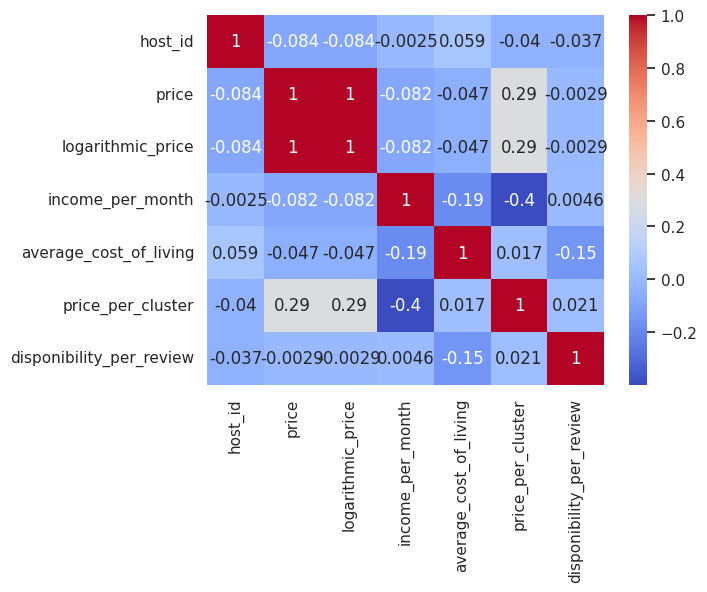

In [30]:
# Step - 6 Feature Correlation
corr = mexico_airbnb_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

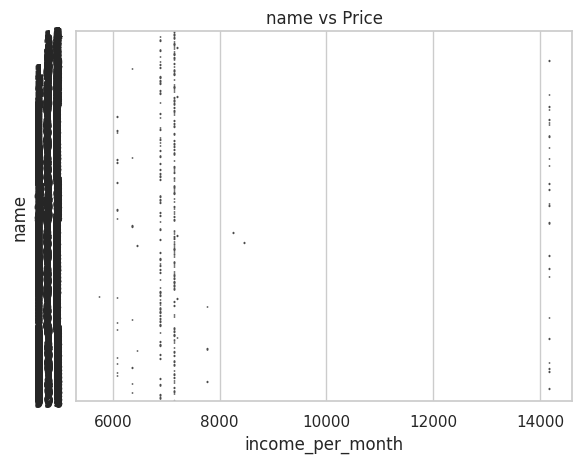

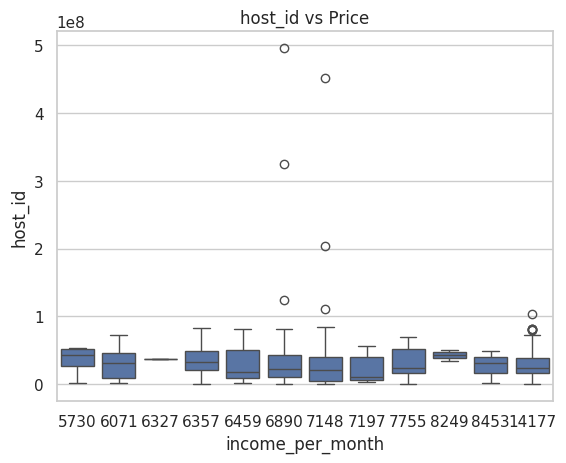

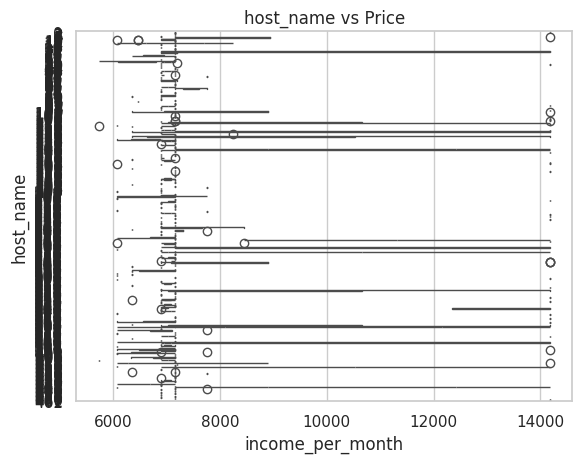

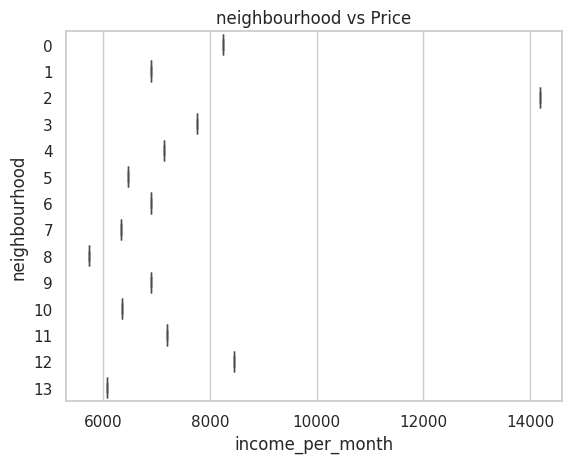

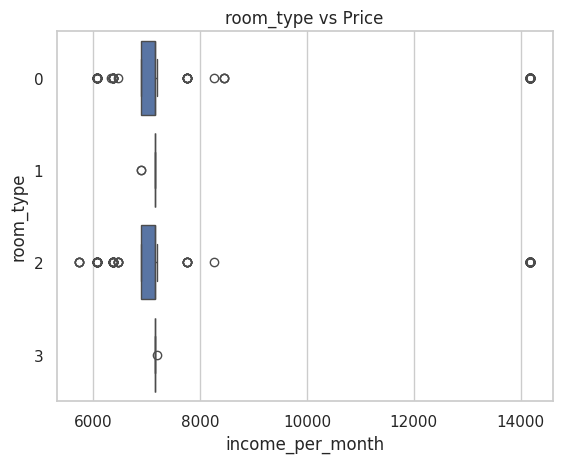

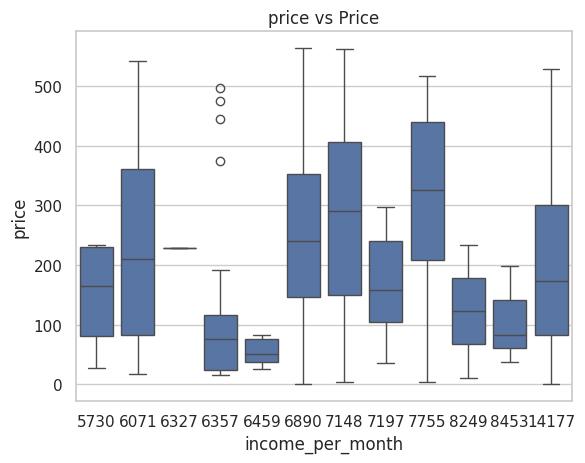

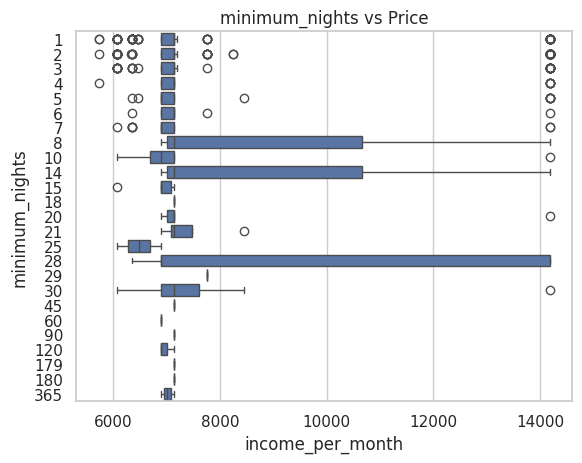

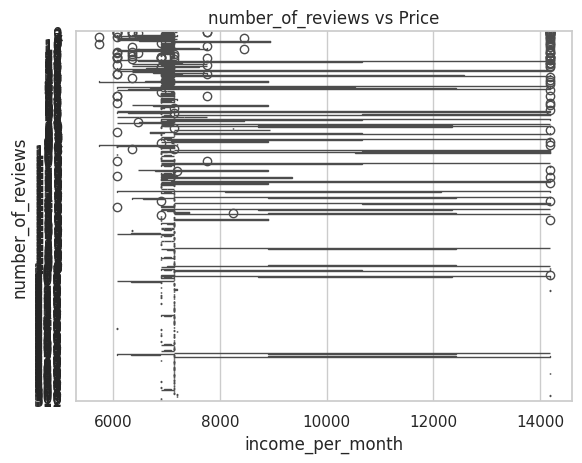

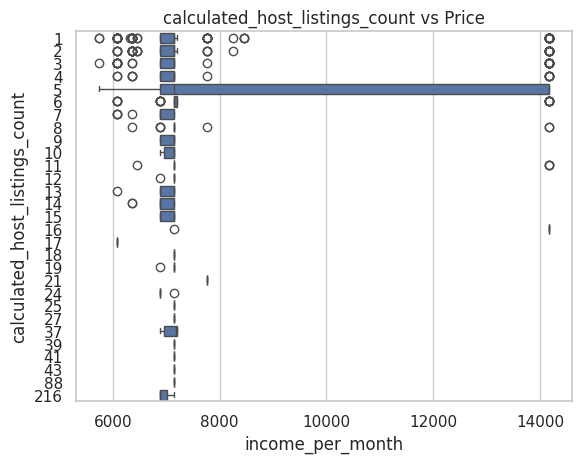

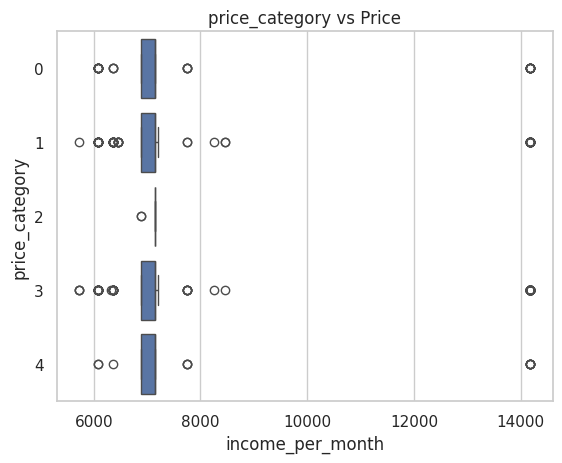

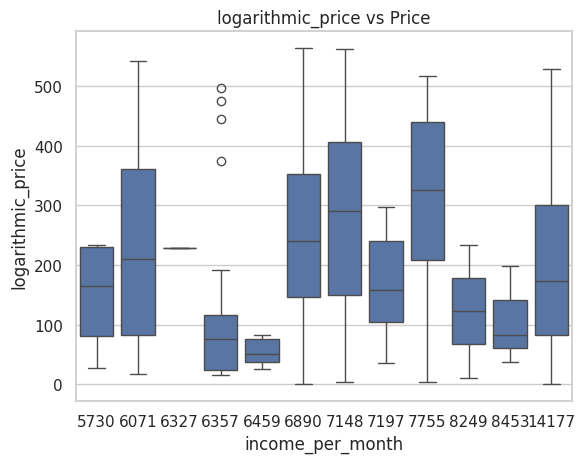

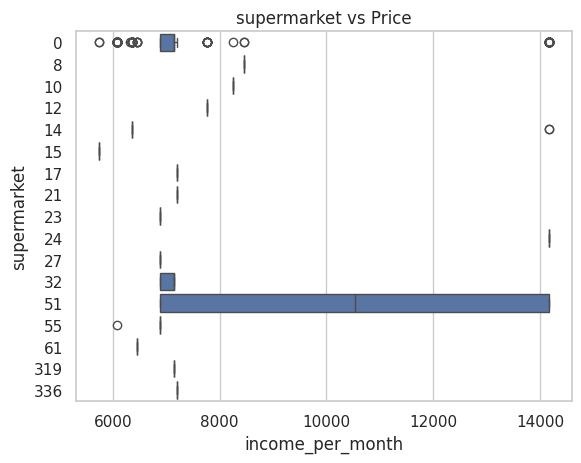

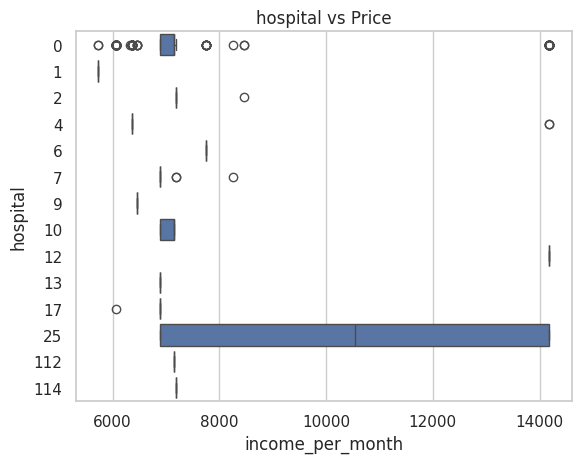

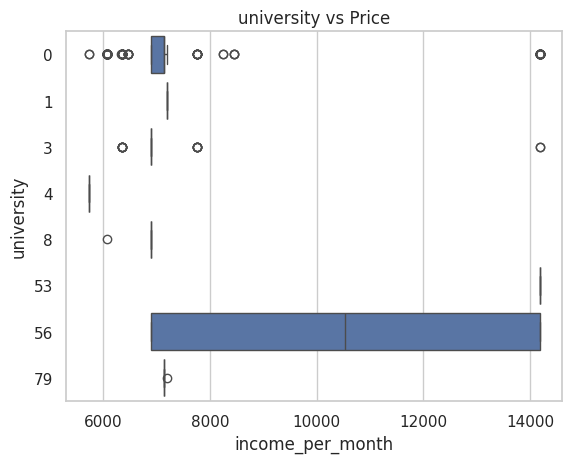

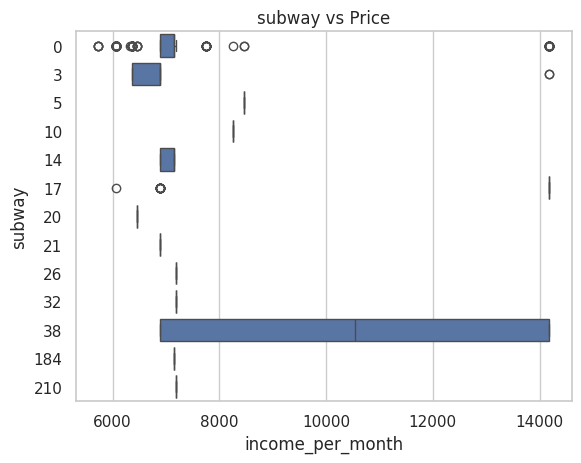

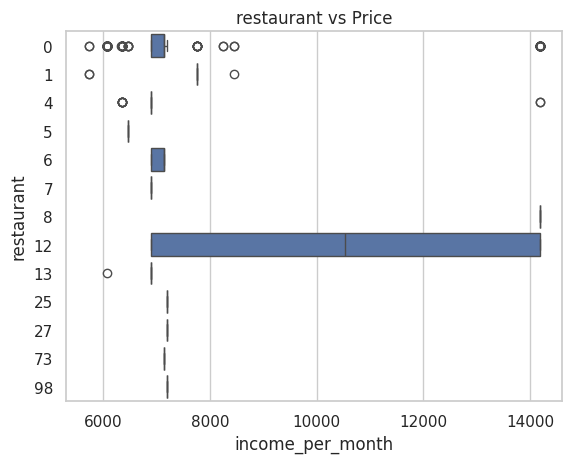

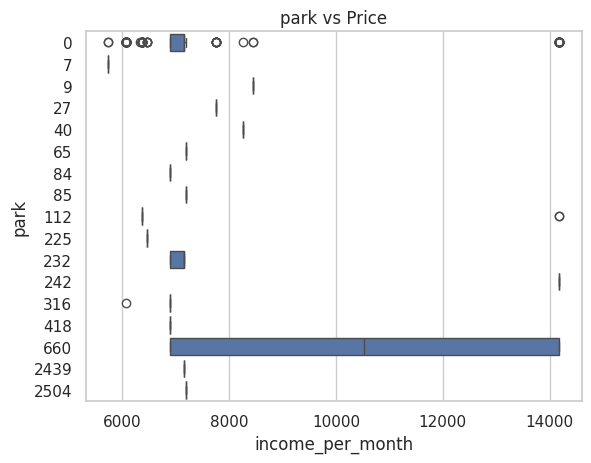

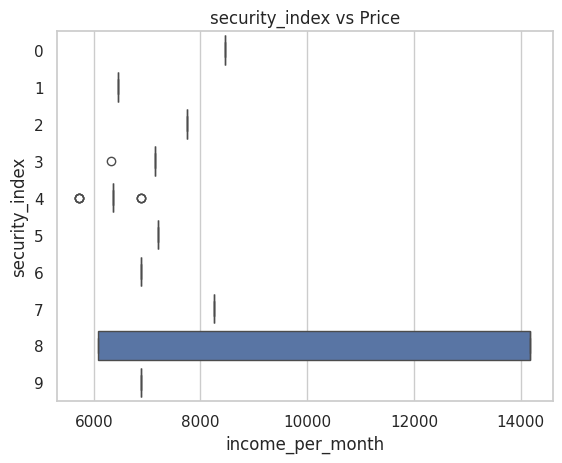

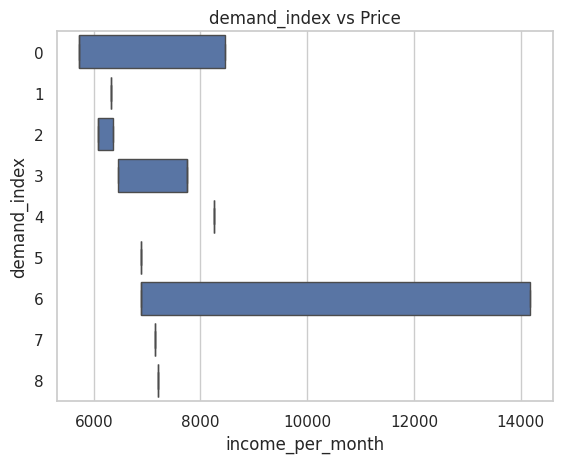

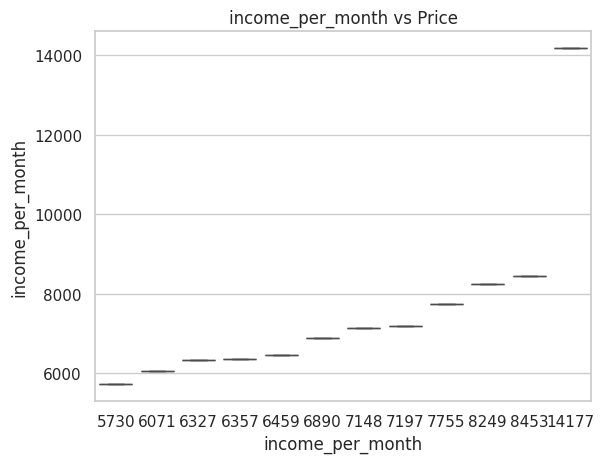

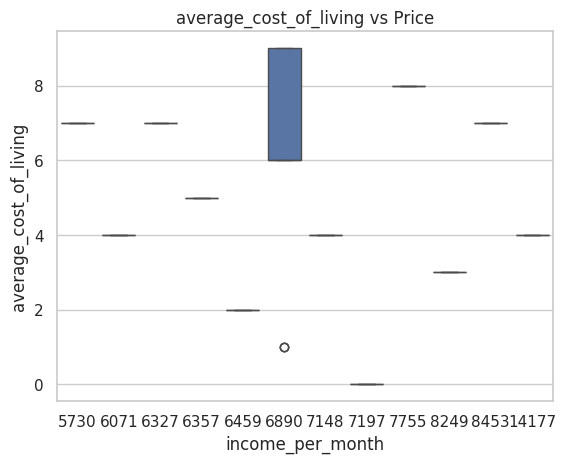

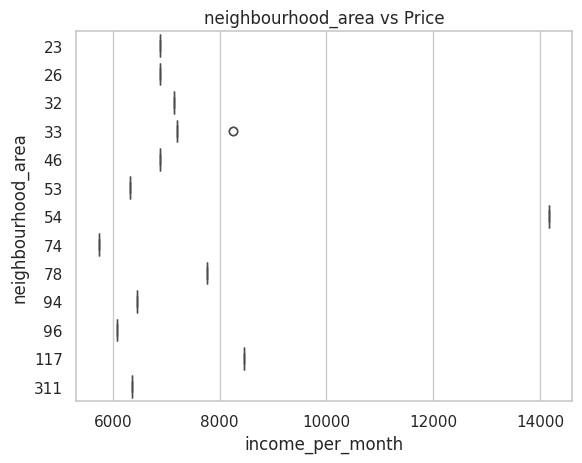

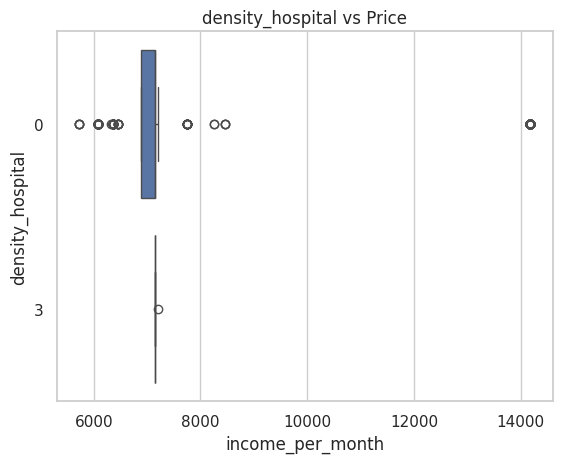

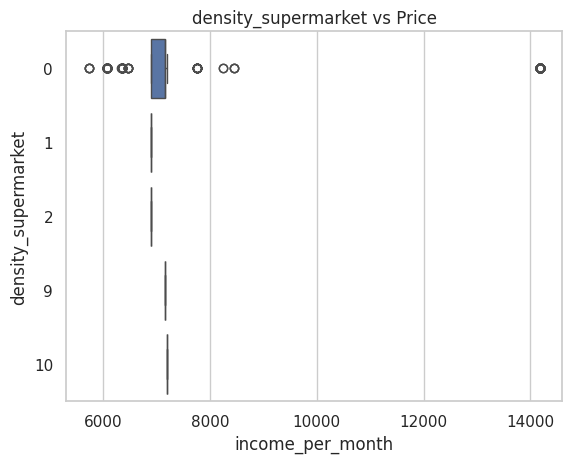

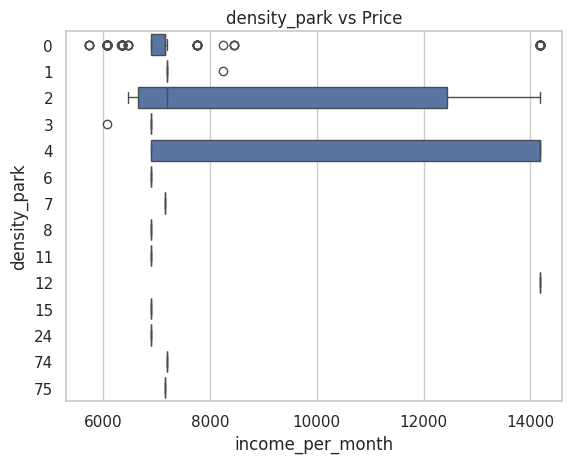

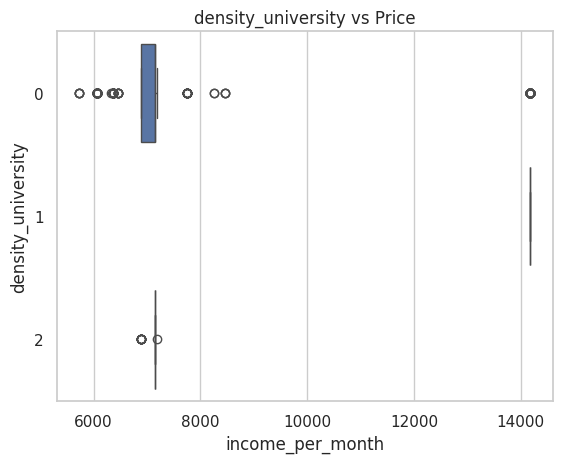

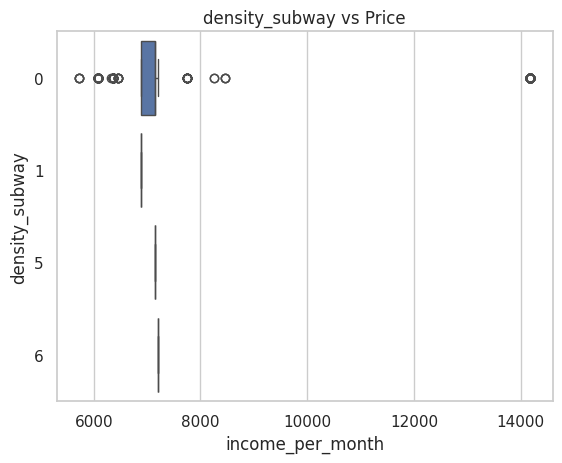

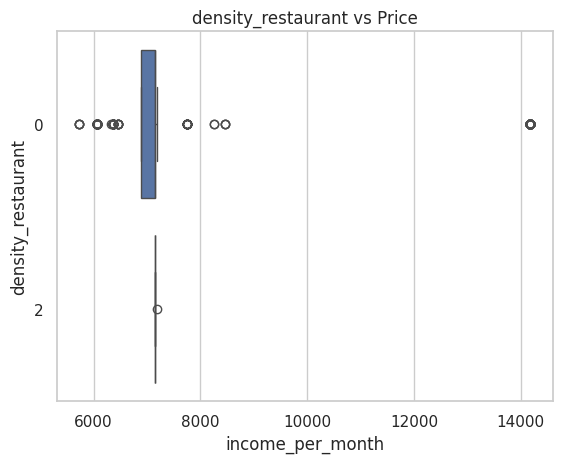

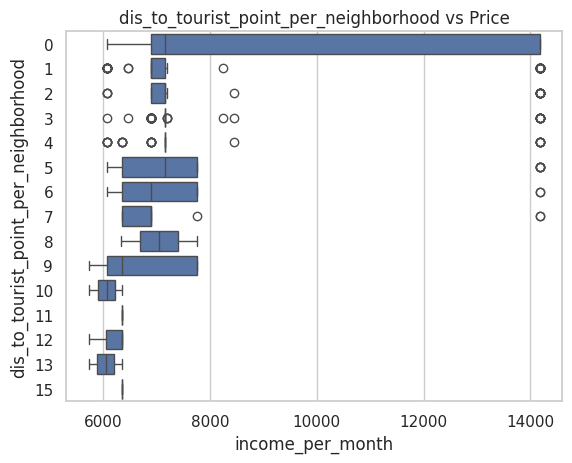

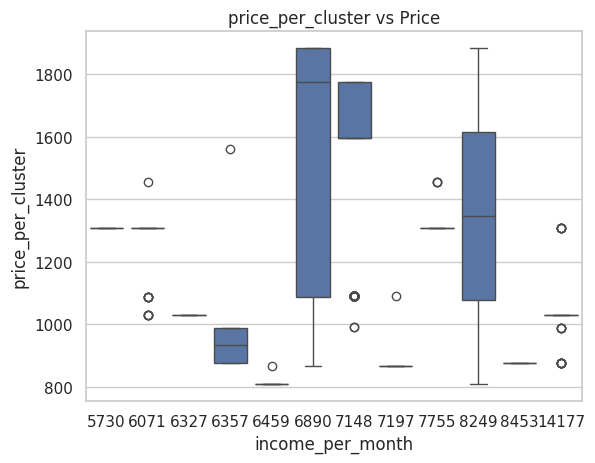

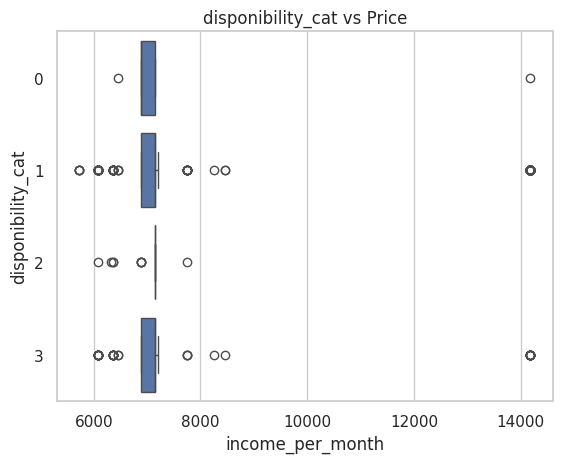

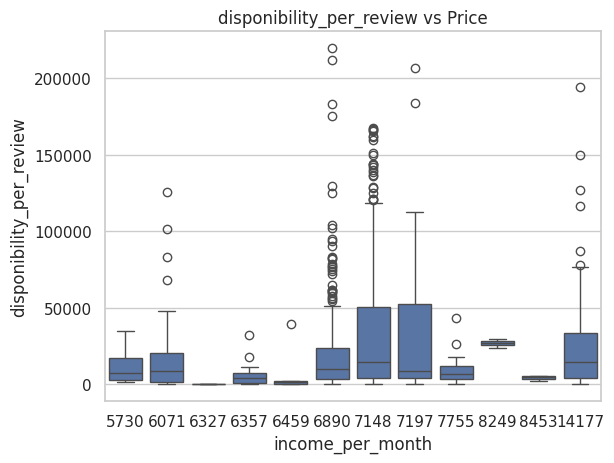

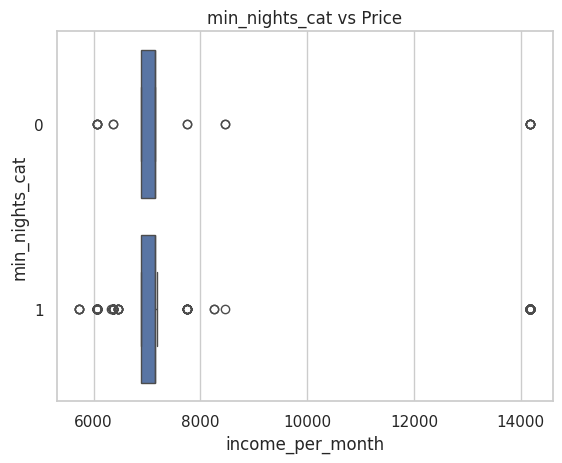

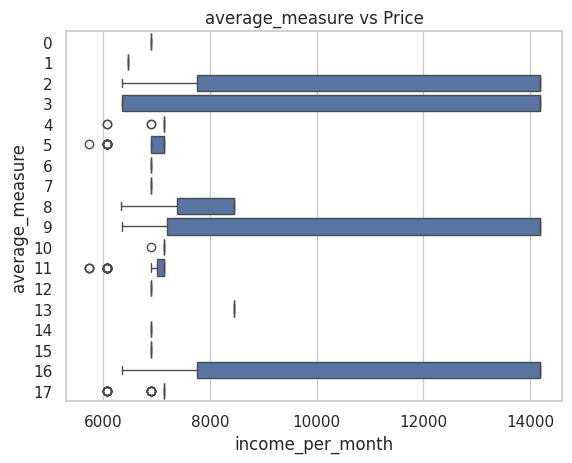

In [35]:
# Step - 7 - income vs price_category
for col in numerical_cols:
    sns.boxplot(x='income_per_month', y=col, data=mexico_airbnb_df)
    plt.title(f'{col} vs Price')
    plt.show()

**Categorical**

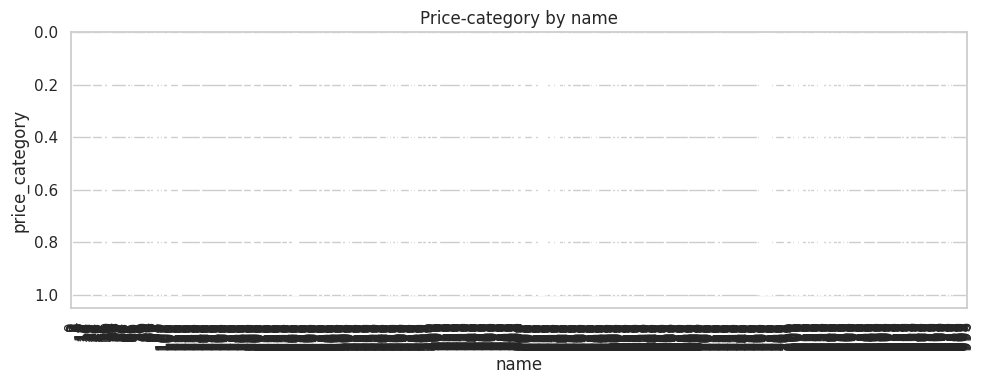

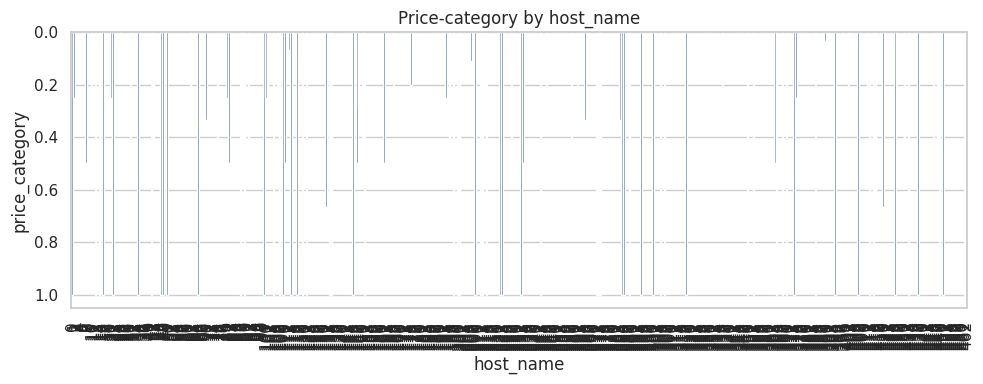

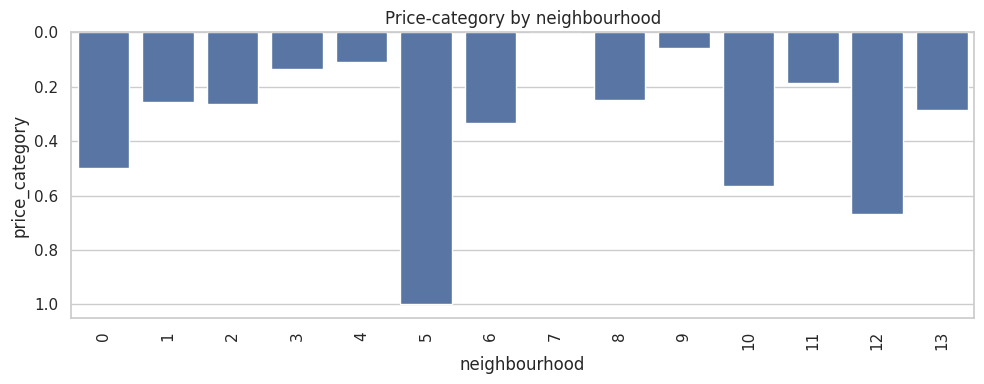

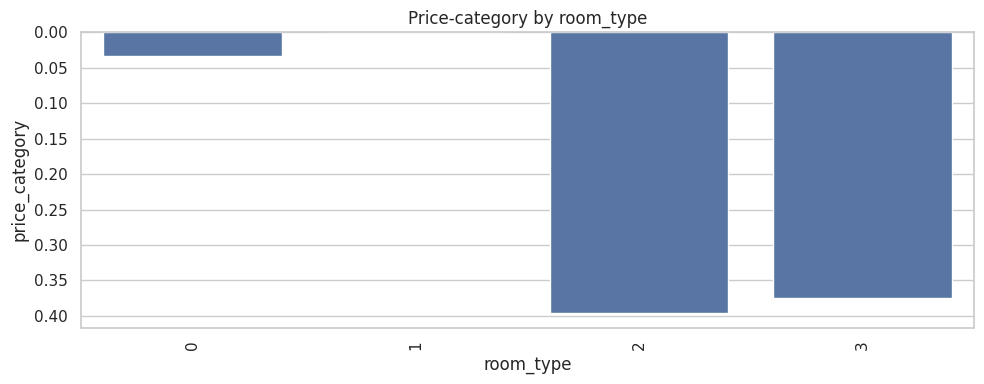

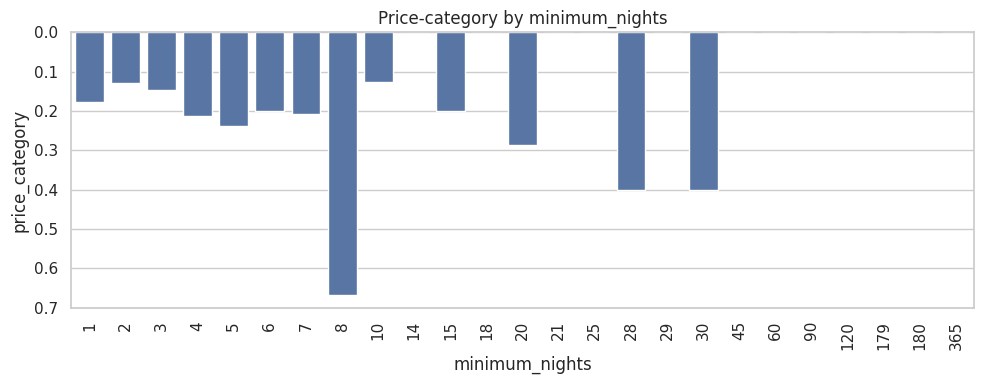

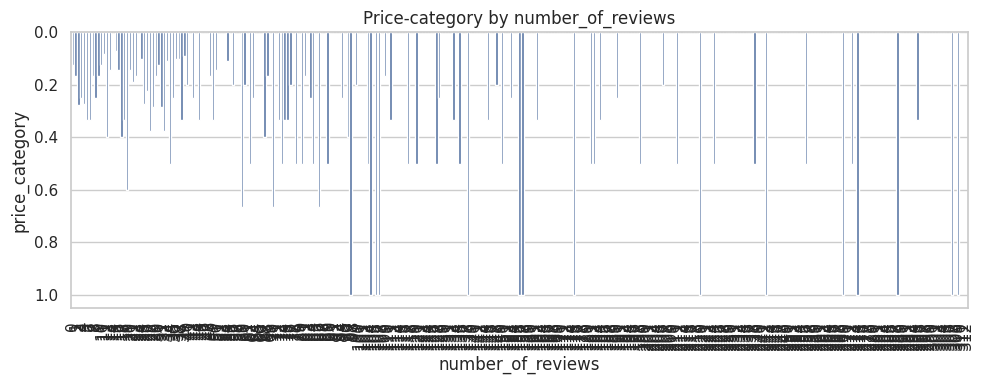

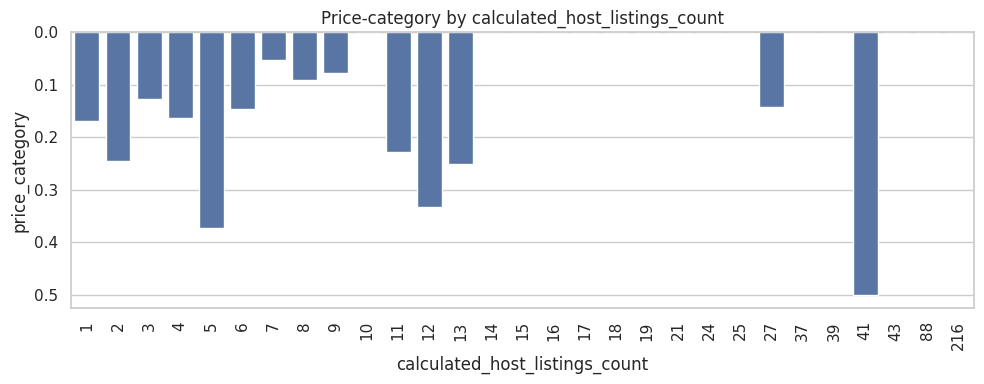

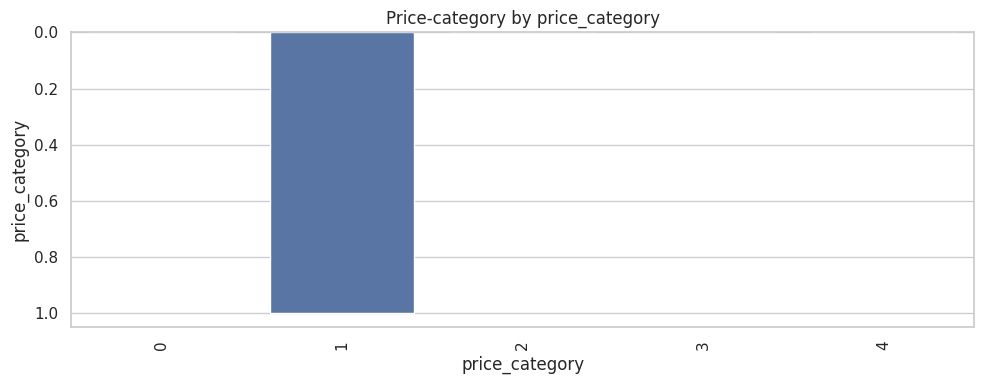

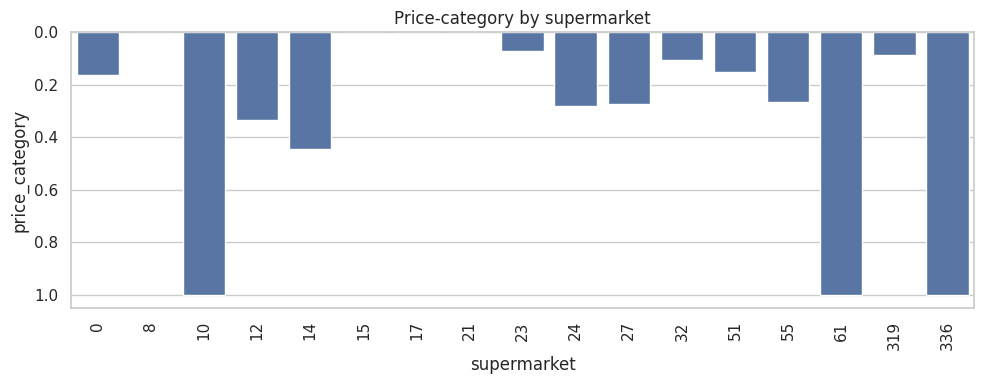

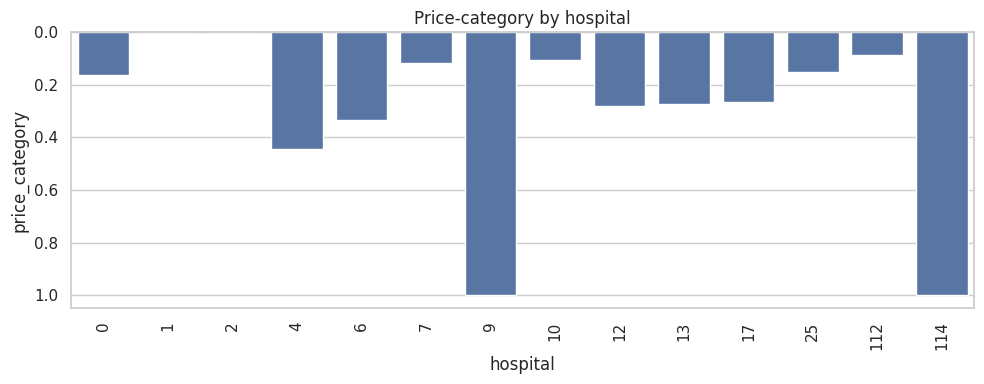

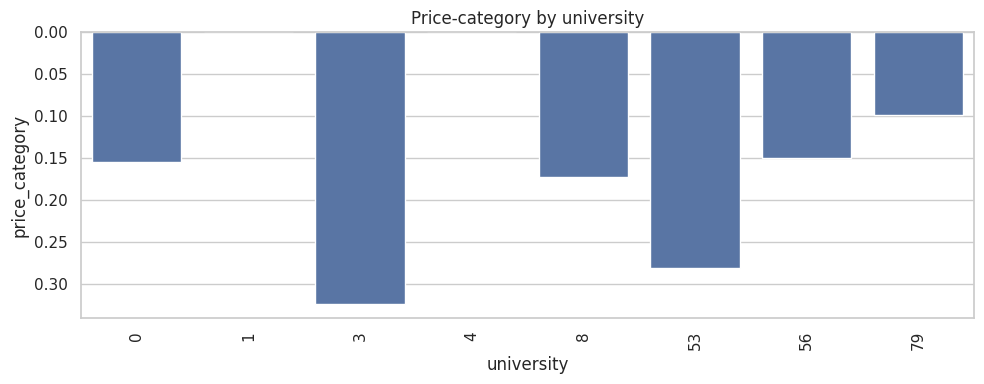

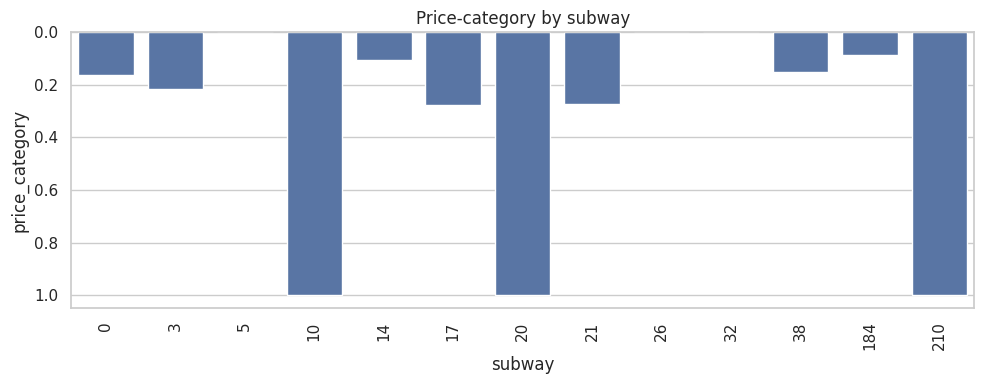

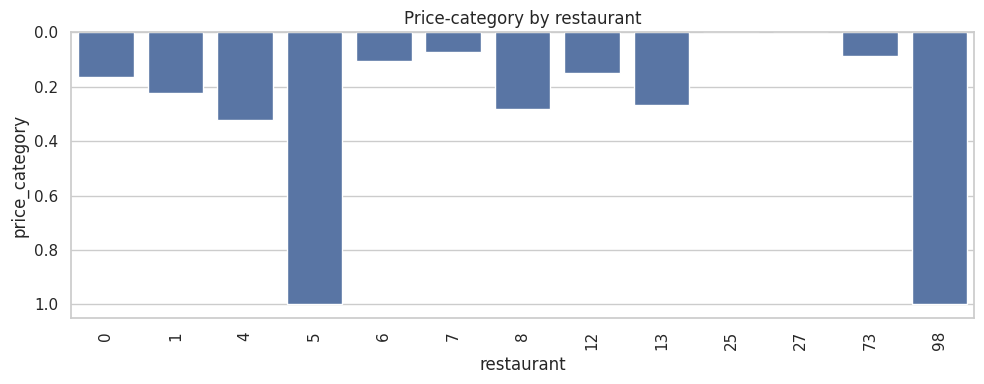

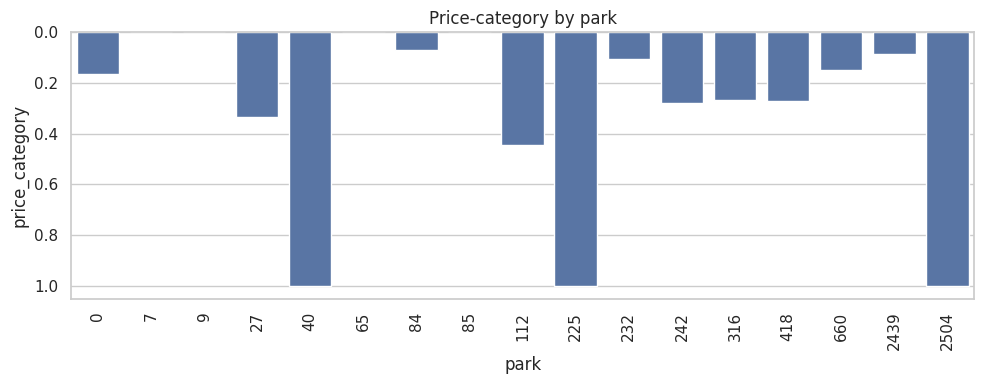

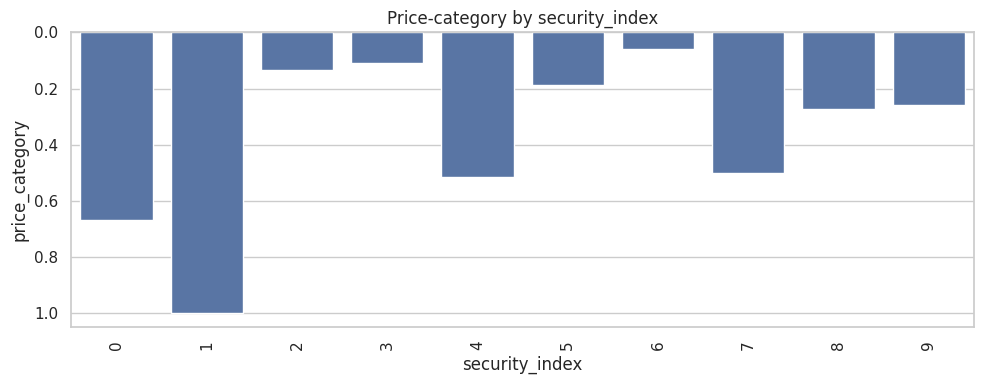

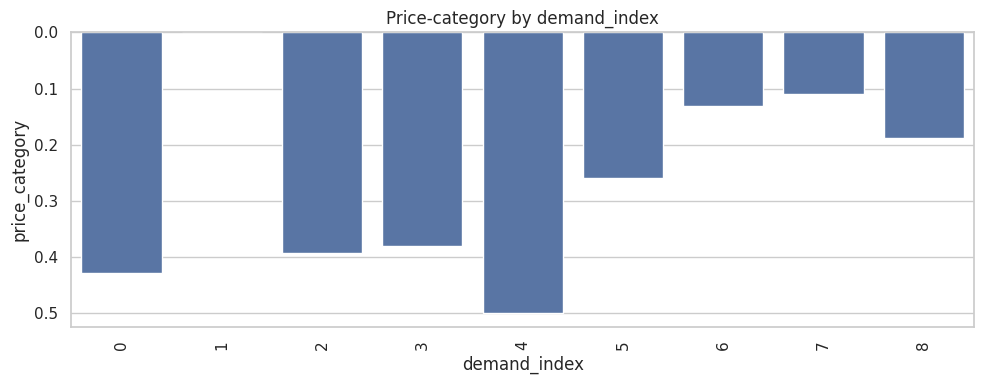

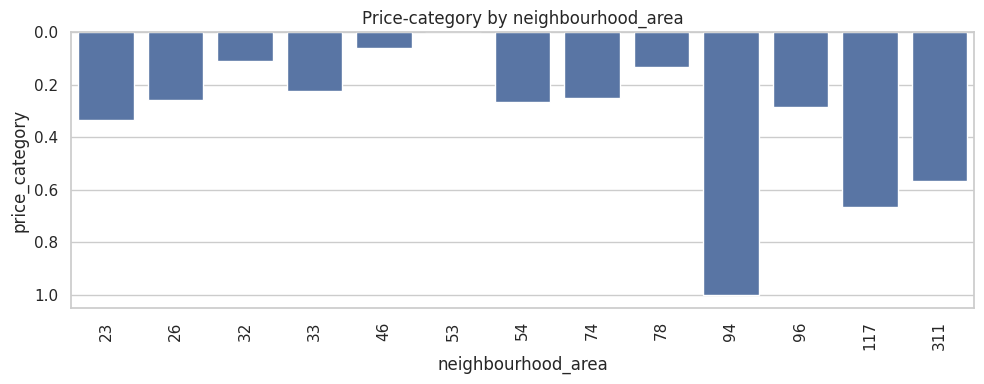

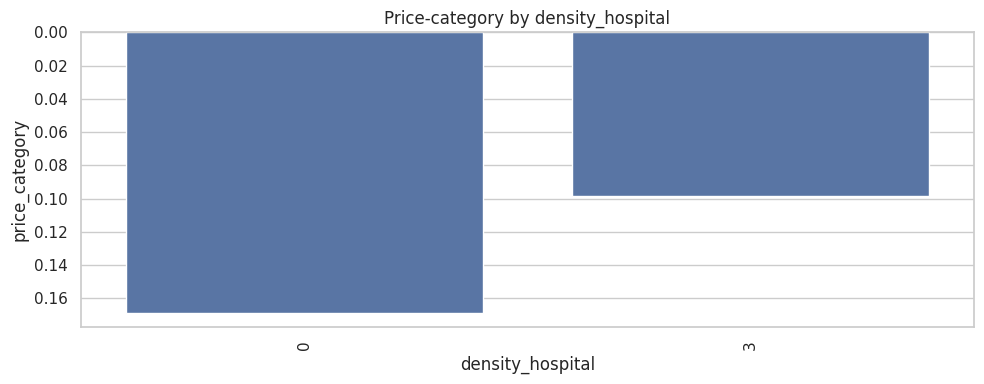

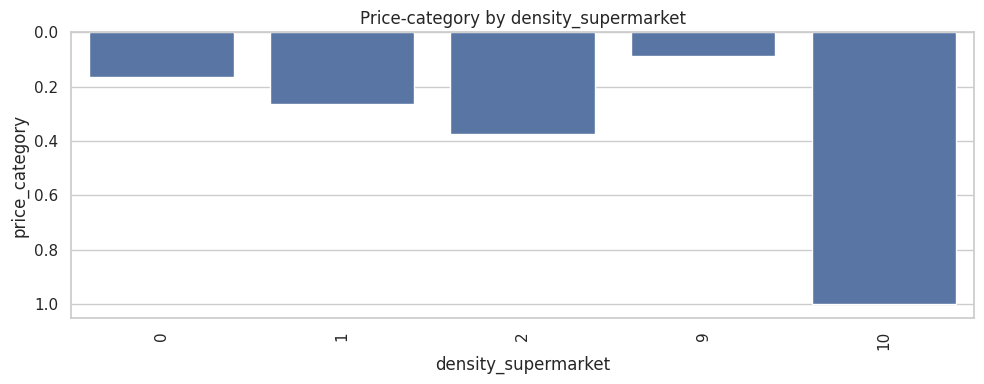

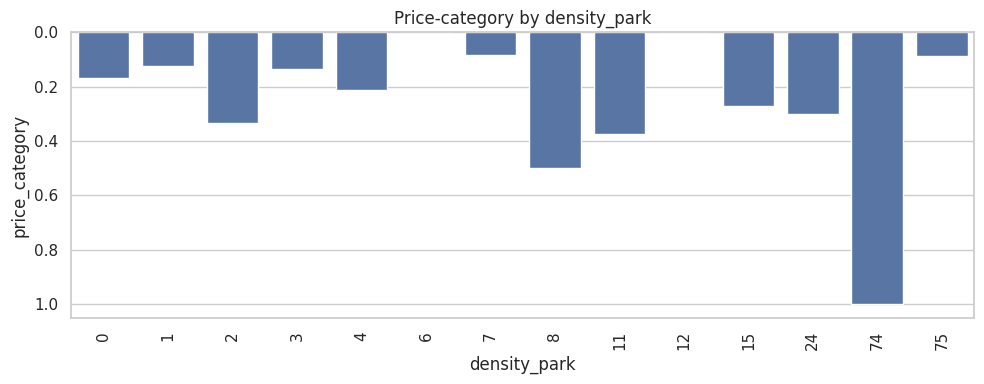

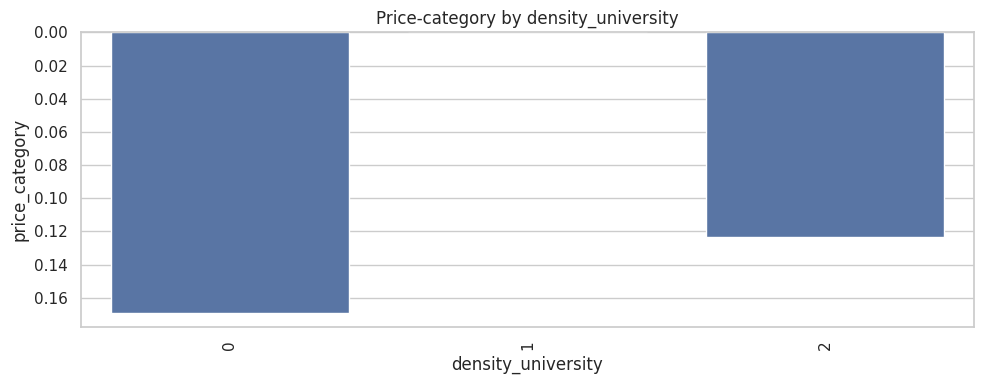

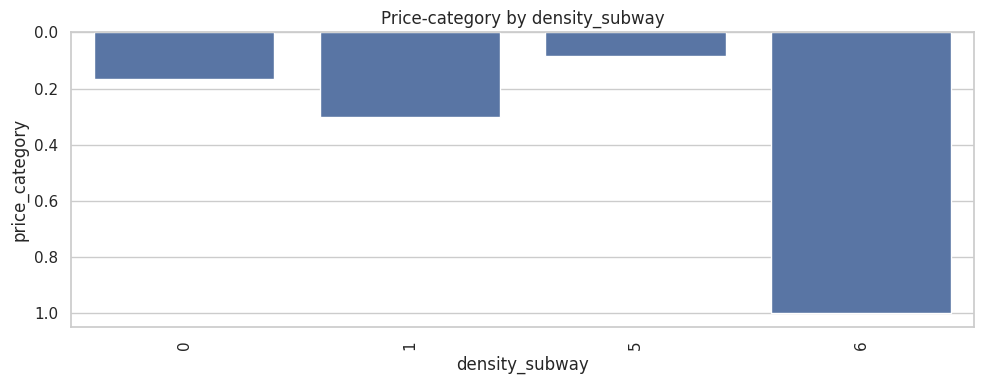

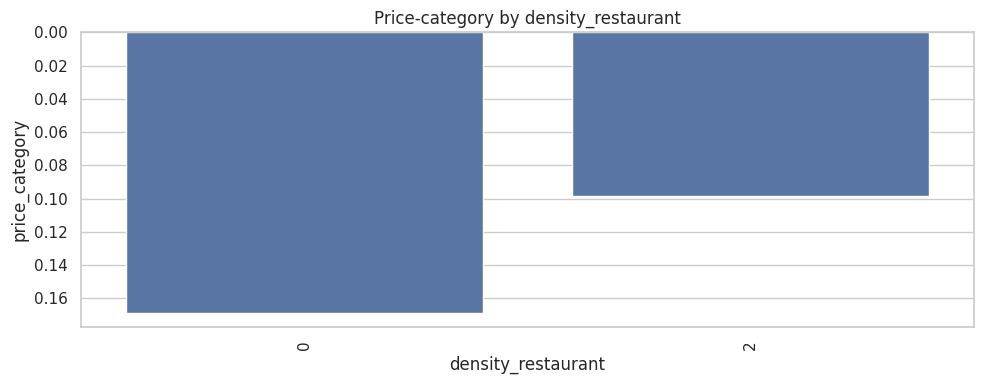

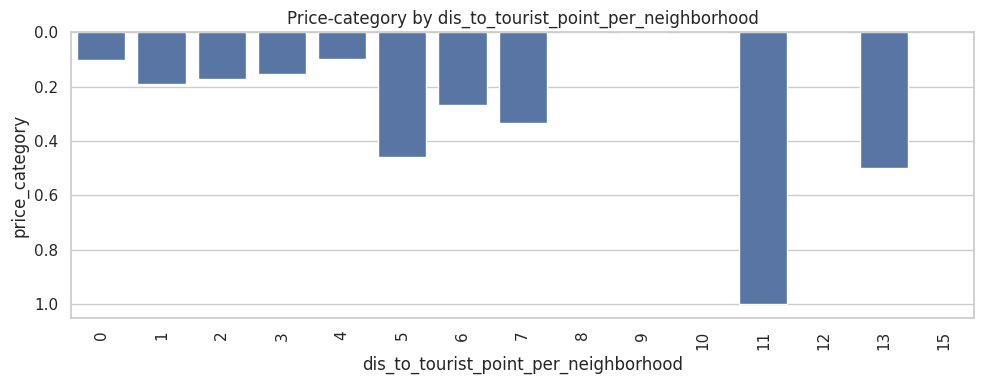

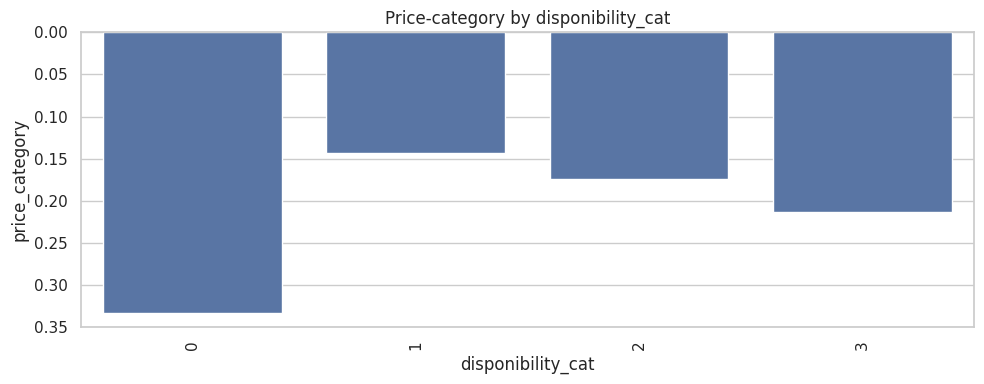

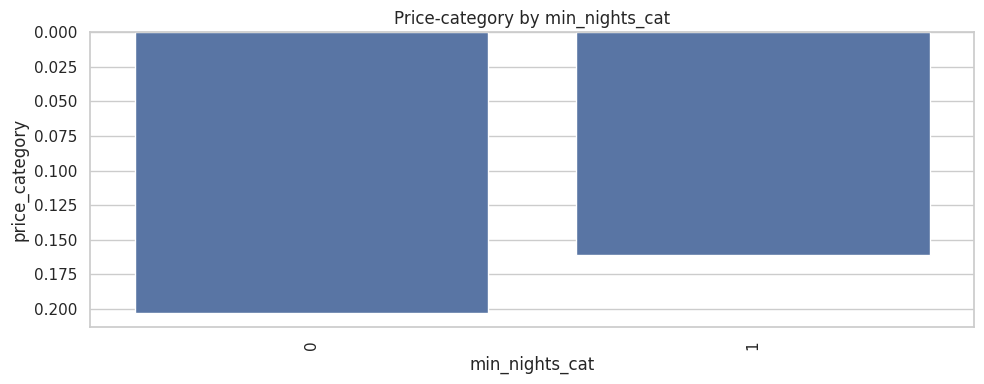

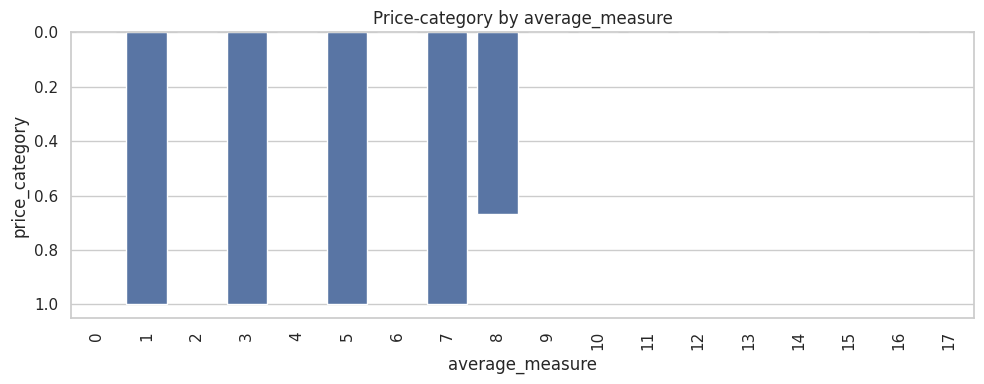

In [39]:
%matplotlib inline

sns.set(style="whitegrid")

# Looping through categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))  # <-- Make room for x-labels
    sns.barplot(
        x=col,
        y='price_category',
        data=mexico_airbnb_df,
        estimator=lambda x: sum(x == 1) / len(x),
        errorbar=None  # Avoid confidence interval clutter
    )
    plt.xticks(rotation=90)
    plt.title(f'Price-category by {col}')
    plt.tight_layout()
    plt.show()

Correlation of 'income per month' with 'income per month': The cell at the intersection of 'income per month' and 'income per month' has a value of 1, which is expected because the variable is perfectly correlated with itself. Correlation of 'logarithmic price' with 'price': Similarly, the cell at the intersection of 'logarithmic_price' and 'price' has a value of 1, indicating perfect self-correlation.
The cells at the intersection of 'price' and 'average_cost of living' (and vice versa) show a correlation coefficient of -0.047.

The value of -0.047 is very close to zero indicating a very weak or practically negligible linear relationship between the 'price' and 'average cost of living variables.

Direction: The negative sign suggests a very slightly inverse relationship. This would mean that as the 'average cost of living' (represented numerically) increases, the likelihood of setting high prices will cause less reantability. However, given small magnitude, this relationship is not very meaninful.

This heatmap indicates that there is no significant linear correlation between the 'price' variable and the numerical representation of the 'average cost of living' variable in our dataset.

X-axis: Represents different categories within the 'price category' feature, which is also a categorical value within our dataset.
Y-axis: Represents the price_category ranging from 0.00 to 1 (or 0% to 100%).

Interpretation: This chart shows how price_category varies across different values of the 'neighbourhood' feature. For example: Category '5' in 'neighbourhood' has a high price_category of 1 or 100%.

Category '1' has a lower price_category (around 0.10 or 10%). The price_category varies significantly across different 'neighbourhood' categories, suggesting that 'neighbourhood' might be a useful feature for predicting icome.

In summary, these charts provide valuable insights into how different categorical features influence the income of our potential rental acquisitions, which is a fundamental aspect of exploratory data analysis for a prediction task.


Summary of EDA for our Airbnb Mexico City data set (Exploratory Data Analysis): Dataset Overview: The dataset contains 1000 rows and 34 columns of information. Most columns are categorical (27 out of 34).

Missing Values: Our data set had no missing values in any columns.

Data Types & Memory Optimization: Categorical features were converted from object to category types. This ultimately reduced memory usage to 265 kb, making processing more efficient.

Distributions of the top categories for each categorical column were visualized using count plots. Some features like price category show highly skewed distributions, implying that a few categories dominate.

Airbnb Patterns: Popular stays and revenue may be closelly related, while other categories may be grouped or one-hot encoded carefully to avoid sparsity.

Our ECA reveals several observations based in our dataset.

The revenue does not seem too optimistic in our data set, but we can conduct further investigations to arrive at an ultimate conclusion.

Understanding frequency and distribution of categorical features helps in feature engineering.
Transforming object columns to category saves memory and improves speed.
This data is clean and handles imbalances during modeling leading to better feature engineering based on frequency patterns.

Conclusion:The dataset is clean and optimized for modeling.
However, the class imbalance in the target variable is a major consideration for predictive modeling.
